# Course project details

# General perceptron model

<img src="./ArtificialNeuronModel.png" alt="This is the figure caption" id="fig_id" title="This is where the title goes" style="height:200px;width:400px;">

    

[Activation Functions](https://en.wikipedia.org/wiki/Activation_function)



[**Neural Networks**][1] consist of the following components
    - An input layer, x
    - An arbitrary amount of hidden layers
    - An output layer, ŷ
    - A set of weights and biases between layers, W and b
    - A choice of activation function for each hidden layer, σ.


<img src="./NN.png" alt="This is the figure caption" id="fig_id" title="This is where the title goes" style="height:300px;width:400px;">  


[1]:https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6
 



# Neural Network Implementation 

In [1]:
# This code inspired by an internet source code


import numpy as np

# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
xPredicted = np.array(([4,8]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
xPredicted = xPredicted/np.amax(xPredicted, axis=0) # maximum of xPredicted (our input data for the prediction)
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    print ("Output: \n" + str(self.forward(xPredicted)));

NN = Neural_Network()
for i in range(0,10): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
  print ("\n")
  NN.train(X, y)

NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.824916  ]
 [0.79880004]
 [0.88243679]]
Loss: 
0.004281201187929861


# 1

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.82900906]
 [0.80257345]
 [0.88539562]]
Loss: 
0.0038661200625210116


# 2

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.83273632]
 [0.80602165]
 [0.88807463]]
Loss: 
0.003510773341177204


# 3

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.83614339]
 [0.80918402]
 [0.89051056]]
Loss: 
0.0032048186087874956


# 4

Input (scaled): 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [

In [2]:
from sklearn.neural_network import MLPRegressor
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
 |  
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(3)
n = 200
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.01, hidden_layer_sizes = (100,), max_iter = 500, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
a = clf.fit(X, y)

Iteration 1, loss = 4577.20669437
Iteration 2, loss = 4573.39749978
Iteration 3, loss = 4569.59099438
Iteration 4, loss = 4565.78723479
Iteration 5, loss = 4561.98626949
Iteration 6, loss = 4558.18814291
Iteration 7, loss = 4554.39289585
Iteration 8, loss = 4550.60056389
Iteration 9, loss = 4546.81117901
Iteration 10, loss = 4543.02477160
Iteration 11, loss = 4539.24137043
Iteration 12, loss = 4535.46100146
Iteration 13, loss = 4531.68368673
Iteration 14, loss = 4527.90944371
Iteration 15, loss = 4524.13828503
Iteration 16, loss = 4520.37021851
Iteration 17, loss = 4516.60524724
Iteration 18, loss = 4512.84336984
Iteration 19, loss = 4509.08458077
Iteration 20, loss = 4505.32887089
Iteration 21, loss = 4501.57622803
Iteration 22, loss = 4497.82663746
Iteration 23, loss = 4494.08008216
Iteration 24, loss = 4490.33654314
Iteration 25, loss = 4486.59599975
Iteration 26, loss = 4482.85843011
Iteration 27, loss = 4479.12381123
Iteration 28, loss = 4475.39211906
Iteration 29, loss = 4471.663

Iteration 232, loss = 3726.48875839
Iteration 233, loss = 3722.78799516
Iteration 234, loss = 3719.08705959
Iteration 235, loss = 3715.38597379
Iteration 236, loss = 3711.68476194
Iteration 237, loss = 3707.98345035
Iteration 238, loss = 3704.28206760
Iteration 239, loss = 3700.58064462
Iteration 240, loss = 3696.87921473
Iteration 241, loss = 3693.17781370
Iteration 242, loss = 3689.47647970
Iteration 243, loss = 3685.77525329
Iteration 244, loss = 3682.07417730
Iteration 245, loss = 3678.37329670
Iteration 246, loss = 3674.67265834
Iteration 247, loss = 3670.97231080
Iteration 248, loss = 3667.27230398
Iteration 249, loss = 3663.57268882
Iteration 250, loss = 3659.87351690
Iteration 251, loss = 3656.17484008
Iteration 252, loss = 3652.47671009
Iteration 253, loss = 3648.77917749
Iteration 254, loss = 3645.08228973
Iteration 255, loss = 3641.38609464
Iteration 256, loss = 3637.69064190
Iteration 257, loss = 3633.99597280
Iteration 258, loss = 3630.30212450
Iteration 259, loss = 3626.6

Iteration 460, loss = 2933.43399744
Iteration 461, loss = 2930.36873885
Iteration 462, loss = 2927.30855584
Iteration 463, loss = 2924.25347266
Iteration 464, loss = 2921.20351235
Iteration 465, loss = 2918.15869629
Iteration 466, loss = 2915.11904369
Iteration 467, loss = 2912.08457110
Iteration 468, loss = 2909.05529197
Iteration 469, loss = 2906.03121642
Iteration 470, loss = 2903.01235225
Iteration 471, loss = 2899.99870577
Iteration 472, loss = 2896.99028040
Iteration 473, loss = 2893.98707513
Iteration 474, loss = 2890.98908562
Iteration 475, loss = 2887.99630637
Iteration 476, loss = 2885.00873151
Iteration 477, loss = 2882.02635364
Iteration 478, loss = 2879.04916317
Iteration 479, loss = 2876.07714992
Iteration 480, loss = 2873.11030462
Iteration 481, loss = 2870.14861867
Iteration 482, loss = 2867.19208327
Iteration 483, loss = 2864.24068980
Iteration 484, loss = 2861.29443120
Iteration 485, loss = 2858.35330242
Iteration 486, loss = 2855.41729976
Iteration 487, loss = 2852.4

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


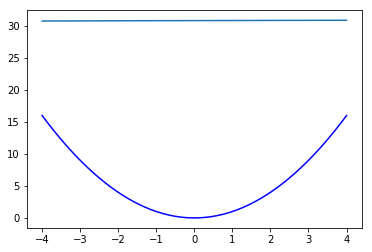

In [4]:
x_ = np.linspace(-4, 4, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.plot(pred_x, pred_y, '-') # plot network output

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(3)
n = 20
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.00000000000001, hidden_layer_sizes = (1000,1000), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
a = clf.fit(X, y)

Iteration 1, loss = 4605.70749800
Iteration 2, loss = 4400.75886981
Iteration 3, loss = 4223.94089195
Iteration 4, loss = 4083.14452664
Iteration 5, loss = 3976.73435898
Iteration 6, loss = 3897.56949544
Iteration 7, loss = 3837.53904199
Iteration 8, loss = 3790.02281021
Iteration 9, loss = 3750.41858348
Iteration 10, loss = 3715.78246721
Iteration 11, loss = 3684.30371991
Iteration 12, loss = 3654.88417097
Iteration 13, loss = 3626.85815378
Iteration 14, loss = 3599.81772120
Iteration 15, loss = 3573.50554288
Iteration 16, loss = 3547.75250399
Iteration 17, loss = 3522.44591405
Iteration 18, loss = 3497.51491836
Iteration 19, loss = 3472.92287481
Iteration 20, loss = 3448.66232549
Iteration 21, loss = 3424.74850807
Iteration 22, loss = 3401.20784721
Iteration 23, loss = 3378.06299397
Iteration 24, loss = 3355.32063517
Iteration 25, loss = 3332.96991923
Iteration 26, loss = 3310.99196231
Iteration 27, loss = 3289.37178344
Iteration 28, loss = 3268.10675300
Iteration 29, loss = 3247.208

Iteration 232, loss = 2454.51071238
Iteration 233, loss = 2454.24099478
Iteration 234, loss = 2453.95722209
Iteration 235, loss = 2453.66287827
Iteration 236, loss = 2453.37012520
Iteration 237, loss = 2453.08248468
Iteration 238, loss = 2452.78650720
Iteration 239, loss = 2452.47160740
Iteration 240, loss = 2452.14411919
Iteration 241, loss = 2451.81672151
Iteration 242, loss = 2451.48796981
Iteration 243, loss = 2451.14586083
Iteration 244, loss = 2450.78971335
Iteration 245, loss = 2450.42578670
Iteration 246, loss = 2450.04374039
Iteration 247, loss = 2449.62611960
Iteration 248, loss = 2449.21893214
Iteration 249, loss = 2448.83597480
Iteration 250, loss = 2448.42590023
Iteration 251, loss = 2447.96895505
Iteration 252, loss = 2447.47225191
Iteration 253, loss = 2446.98755985
Iteration 254, loss = 2446.54473895
Iteration 255, loss = 2446.08990544
Iteration 256, loss = 2445.59766336
Iteration 257, loss = 2445.10583557
Iteration 258, loss = 2444.64522492
Iteration 259, loss = 2444.1

Iteration 460, loss = 2184.96353335
Iteration 461, loss = 2179.83804642
Iteration 462, loss = 2174.86807915
Iteration 463, loss = 2169.98060104
Iteration 464, loss = 2165.39152657
Iteration 465, loss = 2161.17288796
Iteration 466, loss = 2157.05783395
Iteration 467, loss = 2152.85339825
Iteration 468, loss = 2148.55002038
Iteration 469, loss = 2144.15189041
Iteration 470, loss = 2139.65492441
Iteration 471, loss = 2135.00430707
Iteration 472, loss = 2130.16084848
Iteration 473, loss = 2125.06887352
Iteration 474, loss = 2119.94090799
Iteration 475, loss = 2114.93487533
Iteration 476, loss = 2109.76419580
Iteration 477, loss = 2104.27162464
Iteration 478, loss = 2098.47808956
Iteration 479, loss = 2092.60548145
Iteration 480, loss = 2086.69008300
Iteration 481, loss = 2081.01269924
Iteration 482, loss = 2075.86896269
Iteration 483, loss = 2071.09856225
Iteration 484, loss = 2066.38037571
Iteration 485, loss = 2061.64427244
Iteration 486, loss = 2056.80173340
Iteration 487, loss = 2051.9

Iteration 688, loss = 1097.16773247
Iteration 689, loss = 1094.33309087
Iteration 690, loss = 1091.47686369
Iteration 691, loss = 1088.61170837
Iteration 692, loss = 1085.74542146
Iteration 693, loss = 1082.87895169
Iteration 694, loss = 1080.02329149
Iteration 695, loss = 1077.16270505
Iteration 696, loss = 1074.27184627
Iteration 697, loss = 1071.40152717
Iteration 698, loss = 1068.64548396
Iteration 699, loss = 1066.04671591
Iteration 700, loss = 1063.58970533
Iteration 701, loss = 1061.24935058
Iteration 702, loss = 1058.99046477
Iteration 703, loss = 1056.67268419
Iteration 704, loss = 1054.12641160
Iteration 705, loss = 1051.42359158
Iteration 706, loss = 1048.78839886
Iteration 707, loss = 1046.34722034
Iteration 708, loss = 1044.08080166
Iteration 709, loss = 1041.93596091
Iteration 710, loss = 1039.85236144
Iteration 711, loss = 1037.75251498
Iteration 712, loss = 1035.57656140
Iteration 713, loss = 1033.32132807
Iteration 714, loss = 1031.03632694
Iteration 715, loss = 1028.7

Iteration 921, loss = 513.64586018
Iteration 922, loss = 511.24442394
Iteration 923, loss = 508.79934739
Iteration 924, loss = 506.33144208
Iteration 925, loss = 503.93170403
Iteration 926, loss = 501.60609739
Iteration 927, loss = 499.26173812
Iteration 928, loss = 496.88220713
Iteration 929, loss = 494.57007291
Iteration 930, loss = 492.33195206
Iteration 931, loss = 490.04844622
Iteration 932, loss = 487.73270285
Iteration 933, loss = 485.42909219
Iteration 934, loss = 483.13459102
Iteration 935, loss = 480.86503702
Iteration 936, loss = 478.60977322
Iteration 937, loss = 476.37144345
Iteration 938, loss = 474.15055901
Iteration 939, loss = 471.90045298
Iteration 940, loss = 469.67970324
Iteration 941, loss = 467.53982546
Iteration 942, loss = 465.24160572
Iteration 943, loss = 462.99936159
Iteration 944, loss = 460.81247658
Iteration 945, loss = 458.53092385
Iteration 946, loss = 456.25199394
Iteration 947, loss = 454.04277811
Iteration 948, loss = 451.84032097
Iteration 949, loss 

Iteration 1151, loss = 162.31602349
Iteration 1152, loss = 161.45647215
Iteration 1153, loss = 160.61109340
Iteration 1154, loss = 159.70587648
Iteration 1155, loss = 158.76930880
Iteration 1156, loss = 157.88553305
Iteration 1157, loss = 157.04563386
Iteration 1158, loss = 156.19175156
Iteration 1159, loss = 155.29094705
Iteration 1160, loss = 154.36234368
Iteration 1161, loss = 153.44095844
Iteration 1162, loss = 152.59569639
Iteration 1163, loss = 151.82227715
Iteration 1164, loss = 151.02723036
Iteration 1165, loss = 150.18418400
Iteration 1166, loss = 149.35265909
Iteration 1167, loss = 148.57763258
Iteration 1168, loss = 147.81819103
Iteration 1169, loss = 147.04393472
Iteration 1170, loss = 146.30074713
Iteration 1171, loss = 145.60548095
Iteration 1172, loss = 144.89273285
Iteration 1173, loss = 144.14197360
Iteration 1174, loss = 143.40987315
Iteration 1175, loss = 142.73034241
Iteration 1176, loss = 142.06830754
Iteration 1177, loss = 141.40147054
Iteration 1178, loss = 140.7

Iteration 1383, loss = 43.46405780
Iteration 1384, loss = 43.21989069
Iteration 1385, loss = 42.98332392
Iteration 1386, loss = 42.75564426
Iteration 1387, loss = 42.53717917
Iteration 1388, loss = 42.32747840
Iteration 1389, loss = 42.12168828
Iteration 1390, loss = 41.91492349
Iteration 1391, loss = 41.70679416
Iteration 1392, loss = 41.49815265
Iteration 1393, loss = 41.29069847
Iteration 1394, loss = 41.08425103
Iteration 1395, loss = 40.87510449
Iteration 1396, loss = 40.65919588
Iteration 1397, loss = 40.43230936
Iteration 1398, loss = 40.19292681
Iteration 1399, loss = 39.95556274
Iteration 1400, loss = 39.74559315
Iteration 1401, loss = 39.55499926
Iteration 1402, loss = 39.35830937
Iteration 1403, loss = 39.14200172
Iteration 1404, loss = 38.90296987
Iteration 1405, loss = 38.65813353
Iteration 1406, loss = 38.43831514
Iteration 1407, loss = 38.24405989
Iteration 1408, loss = 38.05349589
Iteration 1409, loss = 37.85556334
Iteration 1410, loss = 37.65290973
Iteration 1411, loss

Iteration 1618, loss = 11.24802876
Iteration 1619, loss = 11.17625615
Iteration 1620, loss = 11.09812073
Iteration 1621, loss = 11.02065866
Iteration 1622, loss = 10.95392016
Iteration 1623, loss = 10.89809242
Iteration 1624, loss = 10.84733708
Iteration 1625, loss = 10.79743757
Iteration 1626, loss = 10.74703906
Iteration 1627, loss = 10.69533759
Iteration 1628, loss = 10.64157701
Iteration 1629, loss = 10.58472703
Iteration 1630, loss = 10.52308174
Iteration 1631, loss = 10.45544041
Iteration 1632, loss = 10.38440436
Iteration 1633, loss = 10.31888486
Iteration 1634, loss = 10.26524069
Iteration 1635, loss = 10.21946386
Iteration 1636, loss = 10.17383370
Iteration 1637, loss = 10.12414219
Iteration 1638, loss = 10.07046940
Iteration 1639, loss = 10.01520023
Iteration 1640, loss = 9.96094733
Iteration 1641, loss = 9.90920370
Iteration 1642, loss = 9.86018369
Iteration 1643, loss = 9.81326111
Iteration 1644, loss = 9.76749784
Iteration 1645, loss = 9.72184908
Iteration 1646, loss = 9.6

Iteration 1859, loss = 3.91453709
Iteration 1860, loss = 3.90144429
Iteration 1861, loss = 3.88842240
Iteration 1862, loss = 3.87547139
Iteration 1863, loss = 3.86259055
Iteration 1864, loss = 3.84977816
Iteration 1865, loss = 3.83703077
Iteration 1866, loss = 3.82434718
Iteration 1867, loss = 3.81172736
Iteration 1868, loss = 3.79917181
Iteration 1869, loss = 3.78668164
Iteration 1870, loss = 3.77425643
Iteration 1871, loss = 3.76189531
Iteration 1872, loss = 3.74959741
Iteration 1873, loss = 3.73736129
Iteration 1874, loss = 3.72518619
Iteration 1875, loss = 3.71307144
Iteration 1876, loss = 3.70101644
Iteration 1877, loss = 3.68902128
Iteration 1878, loss = 3.67708574
Iteration 1879, loss = 3.66520934
Iteration 1880, loss = 3.65339148
Iteration 1881, loss = 3.64163112
Iteration 1882, loss = 3.62992747
Iteration 1883, loss = 3.61827979
Iteration 1884, loss = 3.60668732
Iteration 1885, loss = 3.59514947
Iteration 1886, loss = 3.58366556
Iteration 1887, loss = 3.57223491
Iteration 1888

Iteration 2100, loss = 1.85892170
Iteration 2101, loss = 1.85527329
Iteration 2102, loss = 1.85168584
Iteration 2103, loss = 1.84797067
Iteration 2104, loss = 1.84421394
Iteration 2105, loss = 1.84056791
Iteration 2106, loss = 1.83694518
Iteration 2107, loss = 1.83331477
Iteration 2108, loss = 1.82962859
Iteration 2109, loss = 1.82595599
Iteration 2110, loss = 1.82235426
Iteration 2111, loss = 1.81874003
Iteration 2112, loss = 1.81509527
Iteration 2113, loss = 1.81142862
Iteration 2114, loss = 1.80779425
Iteration 2115, loss = 1.80420634
Iteration 2116, loss = 1.80062620
Iteration 2117, loss = 1.79705489
Iteration 2118, loss = 1.79349619
Iteration 2119, loss = 1.78998430
Iteration 2120, loss = 1.78651105
Iteration 2121, loss = 1.78304162
Iteration 2122, loss = 1.77958192
Iteration 2123, loss = 1.77613828
Iteration 2124, loss = 1.77272199
Iteration 2125, loss = 1.76932151
Iteration 2126, loss = 1.76592439
Iteration 2127, loss = 1.76253799
Iteration 2128, loss = 1.75916877
Iteration 2129

Iteration 2341, loss = 1.22741648
Iteration 2342, loss = 1.22608401
Iteration 2343, loss = 1.22475401
Iteration 2344, loss = 1.22342637
Iteration 2345, loss = 1.22210095
Iteration 2346, loss = 1.22077758
Iteration 2347, loss = 1.21945610
Iteration 2348, loss = 1.21813634
Iteration 2349, loss = 1.21681815
Iteration 2350, loss = 1.21550136
Iteration 2351, loss = 1.21418582
Iteration 2352, loss = 1.21287136
Iteration 2353, loss = 1.21155782
Iteration 2354, loss = 1.21024505
Iteration 2355, loss = 1.20893285
Iteration 2356, loss = 1.20762104
Iteration 2357, loss = 1.20630940
Iteration 2358, loss = 1.20499771
Iteration 2359, loss = 1.20368572
Iteration 2360, loss = 1.20237317
Iteration 2361, loss = 1.20105978
Iteration 2362, loss = 1.19974525
Iteration 2363, loss = 1.19842929
Iteration 2364, loss = 1.19711155
Iteration 2365, loss = 1.19579169
Iteration 2366, loss = 1.19446935
Iteration 2367, loss = 1.19314416
Iteration 2368, loss = 1.19181569
Iteration 2369, loss = 1.19048353
Iteration 2370

Iteration 2582, loss = 0.91109876
Iteration 2583, loss = 0.91014004
Iteration 2584, loss = 0.90918214
Iteration 2585, loss = 0.90822520
Iteration 2586, loss = 0.90726936
Iteration 2587, loss = 0.90631470
Iteration 2588, loss = 0.90536128
Iteration 2589, loss = 0.90440911
Iteration 2590, loss = 0.90345820
Iteration 2591, loss = 0.90250849
Iteration 2592, loss = 0.90155993
Iteration 2593, loss = 0.90061246
Iteration 2594, loss = 0.89966599
Iteration 2595, loss = 0.89872045
Iteration 2596, loss = 0.89777576
Iteration 2597, loss = 0.89683187
Iteration 2598, loss = 0.89588871
Iteration 2599, loss = 0.89494627
Iteration 2600, loss = 0.89400452
Iteration 2601, loss = 0.89306347
Iteration 2602, loss = 0.89212315
Iteration 2603, loss = 0.89118361
Iteration 2604, loss = 0.89024494
Iteration 2605, loss = 0.88930722
Iteration 2606, loss = 0.88837059
Iteration 2607, loss = 0.88743520
Iteration 2608, loss = 0.88650121
Iteration 2609, loss = 0.88556881
Iteration 2610, loss = 0.88463822
Iteration 2611

Iteration 2823, loss = 0.73075642
Iteration 2824, loss = 0.73027674
Iteration 2825, loss = 0.72979803
Iteration 2826, loss = 0.72932029
Iteration 2827, loss = 0.72884352
Iteration 2828, loss = 0.72836773
Iteration 2829, loss = 0.72789287
Iteration 2830, loss = 0.72741895
Iteration 2831, loss = 0.72694595
Iteration 2832, loss = 0.72647391
Iteration 2833, loss = 0.72600282
Iteration 2834, loss = 0.72553270
Iteration 2835, loss = 0.72506354
Iteration 2836, loss = 0.72459534
Iteration 2837, loss = 0.72412809
Iteration 2838, loss = 0.72366180
Iteration 2839, loss = 0.72319647
Iteration 2840, loss = 0.72273211
Iteration 2841, loss = 0.72226874
Iteration 2842, loss = 0.72180636
Iteration 2843, loss = 0.72134498
Iteration 2844, loss = 0.72088460
Iteration 2845, loss = 0.72042522
Iteration 2846, loss = 0.71996686
Iteration 2847, loss = 0.71950953
Iteration 2848, loss = 0.71905323
Iteration 2849, loss = 0.71859799
Iteration 2850, loss = 0.71814380
Iteration 2851, loss = 0.71769069
Iteration 2852

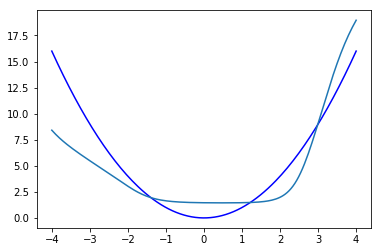

In [6]:
x_ = np.linspace(-4, 4, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.plot(pred_x, pred_y, '-') # plot network output

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(3)
n = 200
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.01, hidden_layer_sizes = (100,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
a = clf.fit(X, y)

Iteration 1, loss = 4577.20669437
Iteration 2, loss = 4573.39749978
Iteration 3, loss = 4569.59099438
Iteration 4, loss = 4565.78723479
Iteration 5, loss = 4561.98626949
Iteration 6, loss = 4558.18814291
Iteration 7, loss = 4554.39289585
Iteration 8, loss = 4550.60056389
Iteration 9, loss = 4546.81117901
Iteration 10, loss = 4543.02477160
Iteration 11, loss = 4539.24137043
Iteration 12, loss = 4535.46100146
Iteration 13, loss = 4531.68368673
Iteration 14, loss = 4527.90944371
Iteration 15, loss = 4524.13828503
Iteration 16, loss = 4520.37021851
Iteration 17, loss = 4516.60524724
Iteration 18, loss = 4512.84336984
Iteration 19, loss = 4509.08458077
Iteration 20, loss = 4505.32887089
Iteration 21, loss = 4501.57622803
Iteration 22, loss = 4497.82663746
Iteration 23, loss = 4494.08008216
Iteration 24, loss = 4490.33654314
Iteration 25, loss = 4486.59599975
Iteration 26, loss = 4482.85843011
Iteration 27, loss = 4479.12381123
Iteration 28, loss = 4475.39211906
Iteration 29, loss = 4471.663

Iteration 233, loss = 3722.78799516
Iteration 234, loss = 3719.08705959
Iteration 235, loss = 3715.38597379
Iteration 236, loss = 3711.68476194
Iteration 237, loss = 3707.98345035
Iteration 238, loss = 3704.28206760
Iteration 239, loss = 3700.58064462
Iteration 240, loss = 3696.87921473
Iteration 241, loss = 3693.17781370
Iteration 242, loss = 3689.47647970
Iteration 243, loss = 3685.77525329
Iteration 244, loss = 3682.07417730
Iteration 245, loss = 3678.37329670
Iteration 246, loss = 3674.67265834
Iteration 247, loss = 3670.97231080
Iteration 248, loss = 3667.27230398
Iteration 249, loss = 3663.57268882
Iteration 250, loss = 3659.87351690
Iteration 251, loss = 3656.17484008
Iteration 252, loss = 3652.47671009
Iteration 253, loss = 3648.77917749
Iteration 254, loss = 3645.08228973
Iteration 255, loss = 3641.38609464
Iteration 256, loss = 3637.69064190
Iteration 257, loss = 3633.99597280
Iteration 258, loss = 3630.30212450
Iteration 259, loss = 3626.60913764
Iteration 260, loss = 3622.9

Iteration 462, loss = 2927.30855584
Iteration 463, loss = 2924.25347266
Iteration 464, loss = 2921.20351235
Iteration 465, loss = 2918.15869629
Iteration 466, loss = 2915.11904369
Iteration 467, loss = 2912.08457110
Iteration 468, loss = 2909.05529197
Iteration 469, loss = 2906.03121642
Iteration 470, loss = 2903.01235225
Iteration 471, loss = 2899.99870577
Iteration 472, loss = 2896.99028040
Iteration 473, loss = 2893.98707513
Iteration 474, loss = 2890.98908562
Iteration 475, loss = 2887.99630637
Iteration 476, loss = 2885.00873151
Iteration 477, loss = 2882.02635364
Iteration 478, loss = 2879.04916317
Iteration 479, loss = 2876.07714992
Iteration 480, loss = 2873.11030462
Iteration 481, loss = 2870.14861867
Iteration 482, loss = 2867.19208327
Iteration 483, loss = 2864.24068980
Iteration 484, loss = 2861.29443120
Iteration 485, loss = 2858.35330242
Iteration 486, loss = 2855.41729976
Iteration 487, loss = 2852.48642039
Iteration 488, loss = 2849.56066287
Iteration 489, loss = 2846.6

Iteration 691, loss = 2369.15690894
Iteration 692, loss = 2367.36594736
Iteration 693, loss = 2365.58048480
Iteration 694, loss = 2363.80051501
Iteration 695, loss = 2362.02603167
Iteration 696, loss = 2360.25702908
Iteration 697, loss = 2358.49350252
Iteration 698, loss = 2356.73544707
Iteration 699, loss = 2354.98285651
Iteration 700, loss = 2353.23572381
Iteration 701, loss = 2351.49404233
Iteration 702, loss = 2349.75780653
Iteration 703, loss = 2348.02701131
Iteration 704, loss = 2346.30165076
Iteration 705, loss = 2344.58171802
Iteration 706, loss = 2342.86720631
Iteration 707, loss = 2341.15810968
Iteration 708, loss = 2339.45442254
Iteration 709, loss = 2337.75613877
Iteration 710, loss = 2336.06325156
Iteration 711, loss = 2334.37575392
Iteration 712, loss = 2332.69363888
Iteration 713, loss = 2331.01689938
Iteration 714, loss = 2329.34552915
Iteration 715, loss = 2327.67952310
Iteration 716, loss = 2326.01887551
Iteration 717, loss = 2324.36357886
Iteration 718, loss = 2322.7

Iteration 919, loss = 2087.87778462
Iteration 920, loss = 2087.12462365
Iteration 921, loss = 2086.37487025
Iteration 922, loss = 2085.62851384
Iteration 923, loss = 2084.88554383
Iteration 924, loss = 2084.14594967
Iteration 925, loss = 2083.40972078
Iteration 926, loss = 2082.67684658
Iteration 927, loss = 2081.94731651
Iteration 928, loss = 2081.22112001
Iteration 929, loss = 2080.49824652
Iteration 930, loss = 2079.77868549
Iteration 931, loss = 2079.06242638
Iteration 932, loss = 2078.34945866
Iteration 933, loss = 2077.63977180
Iteration 934, loss = 2076.93335528
Iteration 935, loss = 2076.23019858
Iteration 936, loss = 2075.53029119
Iteration 937, loss = 2074.83362260
Iteration 938, loss = 2074.14018232
Iteration 939, loss = 2073.44995986
Iteration 940, loss = 2072.76294473
Iteration 941, loss = 2072.07912646
Iteration 942, loss = 2071.39849457
Iteration 943, loss = 2070.72103861
Iteration 944, loss = 2070.04674813
Iteration 945, loss = 2069.37561267
Iteration 946, loss = 2068.7

Iteration 1143, loss = 1985.79274298
Iteration 1144, loss = 1985.56037958
Iteration 1145, loss = 1985.32939509
Iteration 1146, loss = 1985.09978268
Iteration 1147, loss = 1984.87153558
Iteration 1148, loss = 1984.64464705
Iteration 1149, loss = 1984.41911037
Iteration 1150, loss = 1984.19491875
Iteration 1151, loss = 1983.97206544
Iteration 1152, loss = 1983.75054372
Iteration 1153, loss = 1983.53034693
Iteration 1154, loss = 1983.31146847
Iteration 1155, loss = 1983.09390174
Iteration 1156, loss = 1982.87764013
Iteration 1157, loss = 1982.66267703
Iteration 1158, loss = 1982.44900588
Iteration 1159, loss = 1982.23662013
Iteration 1160, loss = 1982.02551328
Iteration 1161, loss = 1981.81567886
Iteration 1162, loss = 1981.60711041
Iteration 1163, loss = 1981.39980148
Iteration 1164, loss = 1981.19374565
Iteration 1165, loss = 1980.98893651
Iteration 1166, loss = 1980.78536769
Iteration 1167, loss = 1980.58303282
Iteration 1168, loss = 1980.38192560
Iteration 1169, loss = 1980.18203970
I

Iteration 1366, loss = 1957.85261144
Iteration 1367, loss = 1957.79799375
Iteration 1368, loss = 1957.74374868
Iteration 1369, loss = 1957.68987371
Iteration 1370, loss = 1957.63636633
Iteration 1371, loss = 1957.58322405
Iteration 1372, loss = 1957.53044440
Iteration 1373, loss = 1957.47802491
Iteration 1374, loss = 1957.42596314
Iteration 1375, loss = 1957.37425664
Iteration 1376, loss = 1957.32290300
Iteration 1377, loss = 1957.27189980
Iteration 1378, loss = 1957.22124466
Iteration 1379, loss = 1957.17093519
Iteration 1380, loss = 1957.12096902
Iteration 1381, loss = 1957.07134380
Iteration 1382, loss = 1957.02205719
Iteration 1383, loss = 1956.97310686
Iteration 1384, loss = 1956.92449050
Iteration 1385, loss = 1956.87620580
Iteration 1386, loss = 1956.82825047
Iteration 1387, loss = 1956.78062225
Iteration 1388, loss = 1956.73331886
Iteration 1389, loss = 1956.68633806
Iteration 1390, loss = 1956.63967762
Iteration 1391, loss = 1956.59333530
Iteration 1392, loss = 1956.54730891
I

Iteration 1588, loss = 1951.49151162
Iteration 1589, loss = 1951.47794342
Iteration 1590, loss = 1951.46444178
Iteration 1591, loss = 1951.45100610
Iteration 1592, loss = 1951.43763581
Iteration 1593, loss = 1951.42433033
Iteration 1594, loss = 1951.41108907
Iteration 1595, loss = 1951.39791148
Iteration 1596, loss = 1951.38479697
Iteration 1597, loss = 1951.37174500
Iteration 1598, loss = 1951.35875500
Iteration 1599, loss = 1951.34582641
Iteration 1600, loss = 1951.33295870
Iteration 1601, loss = 1951.32015130
Iteration 1602, loss = 1951.30740369
Iteration 1603, loss = 1951.29471532
Iteration 1604, loss = 1951.28208566
Iteration 1605, loss = 1951.26951419
Iteration 1606, loss = 1951.25700037
Iteration 1607, loss = 1951.24454368
Iteration 1608, loss = 1951.23214361
Iteration 1609, loss = 1951.21979965
Iteration 1610, loss = 1951.20751128
Iteration 1611, loss = 1951.19527799
Iteration 1612, loss = 1951.18309930
Iteration 1613, loss = 1951.17097470
Iteration 1614, loss = 1951.15890369
I

Iteration 1811, loss = 1949.37782183
Iteration 1812, loss = 1949.37027062
Iteration 1813, loss = 1949.36272441
Iteration 1814, loss = 1949.35518312
Iteration 1815, loss = 1949.34764665
Iteration 1816, loss = 1949.34011490
Iteration 1817, loss = 1949.33258780
Iteration 1818, loss = 1949.32506526
Iteration 1819, loss = 1949.31754718
Iteration 1820, loss = 1949.31003348
Iteration 1821, loss = 1949.30252407
Iteration 1822, loss = 1949.29501888
Iteration 1823, loss = 1949.28751781
Iteration 1824, loss = 1949.28002078
Iteration 1825, loss = 1949.27252771
Iteration 1826, loss = 1949.26503851
Iteration 1827, loss = 1949.25755311
Iteration 1828, loss = 1949.25007143
Iteration 1829, loss = 1949.24259338
Iteration 1830, loss = 1949.23511888
Iteration 1831, loss = 1949.22764787
Iteration 1832, loss = 1949.22018025
Iteration 1833, loss = 1949.21271596
Iteration 1834, loss = 1949.20525491
Iteration 1835, loss = 1949.19779704
Iteration 1836, loss = 1949.19034226
Iteration 1837, loss = 1949.18289050
I

Iteration 2034, loss = 1947.71052608
Iteration 2035, loss = 1947.70282615
Iteration 2036, loss = 1947.69512270
Iteration 2037, loss = 1947.68741573
Iteration 2038, loss = 1947.67970522
Iteration 2039, loss = 1947.67199115
Iteration 2040, loss = 1947.66427354
Iteration 2041, loss = 1947.65655235
Iteration 2042, loss = 1947.64882759
Iteration 2043, loss = 1947.64109924
Iteration 2044, loss = 1947.63336729
Iteration 2045, loss = 1947.62563174
Iteration 2046, loss = 1947.61789257
Iteration 2047, loss = 1947.61014978
Iteration 2048, loss = 1947.60240335
Iteration 2049, loss = 1947.59465329
Iteration 2050, loss = 1947.58689957
Iteration 2051, loss = 1947.57914219
Iteration 2052, loss = 1947.57138115
Iteration 2053, loss = 1947.56361642
Iteration 2054, loss = 1947.55584801
Iteration 2055, loss = 1947.54807591
Iteration 2056, loss = 1947.54030011
Iteration 2057, loss = 1947.53252059
Iteration 2058, loss = 1947.52473737
Iteration 2059, loss = 1947.51695042
Iteration 2060, loss = 1947.50915975
I

Iteration 2256, loss = 1945.90381526
Iteration 2257, loss = 1945.89520724
Iteration 2258, loss = 1945.88659489
Iteration 2259, loss = 1945.87797823
Iteration 2260, loss = 1945.86935725
Iteration 2261, loss = 1945.86073196
Iteration 2262, loss = 1945.85210234
Iteration 2263, loss = 1945.84346841
Iteration 2264, loss = 1945.83483017
Iteration 2265, loss = 1945.82618760
Iteration 2266, loss = 1945.81754072
Iteration 2267, loss = 1945.80888952
Iteration 2268, loss = 1945.80023401
Iteration 2269, loss = 1945.79157418
Iteration 2270, loss = 1945.78291003
Iteration 2271, loss = 1945.77424156
Iteration 2272, loss = 1945.76556878
Iteration 2273, loss = 1945.75689168
Iteration 2274, loss = 1945.74821027
Iteration 2275, loss = 1945.73952455
Iteration 2276, loss = 1945.73083452
Iteration 2277, loss = 1945.72214018
Iteration 2278, loss = 1945.71344155
Iteration 2279, loss = 1945.70473864
Iteration 2280, loss = 1945.69603148
Iteration 2281, loss = 1945.68732012
Iteration 2282, loss = 1945.67860464
I

Iteration 2478, loss = 1943.88788184
Iteration 2479, loss = 1943.87833253
Iteration 2480, loss = 1943.86877913
Iteration 2481, loss = 1943.85922164
Iteration 2482, loss = 1943.84966005
Iteration 2483, loss = 1943.84009438
Iteration 2484, loss = 1943.83052462
Iteration 2485, loss = 1943.82095077
Iteration 2486, loss = 1943.81137284
Iteration 2487, loss = 1943.80179083
Iteration 2488, loss = 1943.79220474
Iteration 2489, loss = 1943.78261457
Iteration 2490, loss = 1943.77302032
Iteration 2491, loss = 1943.76342200
Iteration 2492, loss = 1943.75381960
Iteration 2493, loss = 1943.74421314
Iteration 2494, loss = 1943.73460260
Iteration 2495, loss = 1943.72498800
Iteration 2496, loss = 1943.71536933
Iteration 2497, loss = 1943.70574660
Iteration 2498, loss = 1943.69611981
Iteration 2499, loss = 1943.68648896
Iteration 2500, loss = 1943.67685405
Iteration 2501, loss = 1943.66721508
Iteration 2502, loss = 1943.65757206
Iteration 2503, loss = 1943.64792499
Iteration 2504, loss = 1943.63827386
I

Iteration 2700, loss = 1941.67111241
Iteration 2701, loss = 1941.66070513
Iteration 2702, loss = 1941.65029424
Iteration 2703, loss = 1941.63987975
Iteration 2704, loss = 1941.62946166
Iteration 2705, loss = 1941.61903997
Iteration 2706, loss = 1941.60861469
Iteration 2707, loss = 1941.59818581
Iteration 2708, loss = 1941.58775334
Iteration 2709, loss = 1941.57731729
Iteration 2710, loss = 1941.56687765
Iteration 2711, loss = 1941.55643443
Iteration 2712, loss = 1941.54598763
Iteration 2713, loss = 1941.53553725
Iteration 2714, loss = 1941.52508329
Iteration 2715, loss = 1941.51462577
Iteration 2716, loss = 1941.50416467
Iteration 2717, loss = 1941.49370001
Iteration 2718, loss = 1941.48323178
Iteration 2719, loss = 1941.47275999
Iteration 2720, loss = 1941.46228464
Iteration 2721, loss = 1941.45180573
Iteration 2722, loss = 1941.44132327
Iteration 2723, loss = 1941.43083726
Iteration 2724, loss = 1941.42034769
Iteration 2725, loss = 1941.40985458
Iteration 2726, loss = 1941.39935793
I

Iteration 2922, loss = 1939.27695521
Iteration 2923, loss = 1939.26581220
Iteration 2924, loss = 1939.25466618
Iteration 2925, loss = 1939.24351715
Iteration 2926, loss = 1939.23236512
Iteration 2927, loss = 1939.22121008
Iteration 2928, loss = 1939.21005203
Iteration 2929, loss = 1939.19889099
Iteration 2930, loss = 1939.18772696
Iteration 2931, loss = 1939.17655993
Iteration 2932, loss = 1939.16538991
Iteration 2933, loss = 1939.15421691
Iteration 2934, loss = 1939.14304092
Iteration 2935, loss = 1939.13186194
Iteration 2936, loss = 1939.12067999
Iteration 2937, loss = 1939.10949507
Iteration 2938, loss = 1939.09830717
Iteration 2939, loss = 1939.08711630
Iteration 2940, loss = 1939.07592246
Iteration 2941, loss = 1939.06472565
Iteration 2942, loss = 1939.05352589
Iteration 2943, loss = 1939.04232316
Iteration 2944, loss = 1939.03111748
Iteration 2945, loss = 1939.01990884
Iteration 2946, loss = 1939.00869725
Iteration 2947, loss = 1938.99748271
Iteration 2948, loss = 1938.98626522
I

Iteration 3145, loss = 1936.72250538
Iteration 3146, loss = 1936.71075339
Iteration 3147, loss = 1936.69900189
Iteration 3148, loss = 1936.68725230
Iteration 3149, loss = 1936.67550051
Iteration 3150, loss = 1936.66374293
Iteration 3151, loss = 1936.65198086
Iteration 3152, loss = 1936.64021799
Iteration 3153, loss = 1936.62845534
Iteration 3154, loss = 1936.61669057
Iteration 3155, loss = 1936.60492152
Iteration 3156, loss = 1936.59314874
Iteration 3157, loss = 1936.58137431
Iteration 3158, loss = 1936.56959906
Iteration 3159, loss = 1936.55782181
Iteration 3160, loss = 1936.54604115
Iteration 3161, loss = 1936.53425719
Iteration 3162, loss = 1936.52247115
Iteration 3163, loss = 1936.51068368
Iteration 3164, loss = 1936.49889419
Iteration 3165, loss = 1936.48710182
Iteration 3166, loss = 1936.47530649
Iteration 3167, loss = 1936.46350885
Iteration 3168, loss = 1936.45170936
Iteration 3169, loss = 1936.43990783
Iteration 3170, loss = 1936.42810375
Iteration 3171, loss = 1936.41629694
I

Iteration 3369, loss = 1934.03569269
Iteration 3370, loss = 1934.02346904
Iteration 3371, loss = 1934.01124354
Iteration 3372, loss = 1933.99901618
Iteration 3373, loss = 1933.98678697
Iteration 3374, loss = 1933.97455591
Iteration 3375, loss = 1933.96232301
Iteration 3376, loss = 1933.95008826
Iteration 3377, loss = 1933.93785167
Iteration 3378, loss = 1933.92561324
Iteration 3379, loss = 1933.91337297
Iteration 3380, loss = 1933.90113087
Iteration 3381, loss = 1933.88888693
Iteration 3382, loss = 1933.87664117
Iteration 3383, loss = 1933.86439357
Iteration 3384, loss = 1933.85214415
Iteration 3385, loss = 1933.83989291
Iteration 3386, loss = 1933.82763984
Iteration 3387, loss = 1933.81538496
Iteration 3388, loss = 1933.80312826
Iteration 3389, loss = 1933.79086974
Iteration 3390, loss = 1933.77860941
Iteration 3391, loss = 1933.76634728
Iteration 3392, loss = 1933.75408333
Iteration 3393, loss = 1933.74181758
Iteration 3394, loss = 1933.72955002
Iteration 3395, loss = 1933.71728067
I

Iteration 3592, loss = 1931.26789417
Iteration 3593, loss = 1931.25531031
Iteration 3594, loss = 1931.24272505
Iteration 3595, loss = 1931.23013841
Iteration 3596, loss = 1931.21755039
Iteration 3597, loss = 1931.20496099
Iteration 3598, loss = 1931.19237020
Iteration 3599, loss = 1931.17977804
Iteration 3600, loss = 1931.16718450
Iteration 3601, loss = 1931.15458959
Iteration 3602, loss = 1931.14199330
Iteration 3603, loss = 1931.12939564
Iteration 3604, loss = 1931.11679662
Iteration 3605, loss = 1931.10419623
Iteration 3606, loss = 1931.09159447
Iteration 3607, loss = 1931.07899135
Iteration 3608, loss = 1931.06638687
Iteration 3609, loss = 1931.05378103
Iteration 3610, loss = 1931.04117383
Iteration 3611, loss = 1931.02856528
Iteration 3612, loss = 1931.01595537
Iteration 3613, loss = 1931.00334411
Iteration 3614, loss = 1930.99073150
Iteration 3615, loss = 1930.97811754
Iteration 3616, loss = 1930.96550224
Iteration 3617, loss = 1930.95288559
Iteration 3618, loss = 1930.94026760
I

Iteration 3814, loss = 1928.44347450
Iteration 3815, loss = 1928.43062570
Iteration 3816, loss = 1928.41777613
Iteration 3817, loss = 1928.40492572
Iteration 3818, loss = 1928.39207416
Iteration 3819, loss = 1928.37922142
Iteration 3820, loss = 1928.36636771
Iteration 3821, loss = 1928.35351316
Iteration 3822, loss = 1928.34065765
Iteration 3823, loss = 1928.32780103
Iteration 3824, loss = 1928.31494334
Iteration 3825, loss = 1928.30208470
Iteration 3826, loss = 1928.28922516
Iteration 3827, loss = 1928.27636462
Iteration 3828, loss = 1928.26350301
Iteration 3829, loss = 1928.25064039
Iteration 3830, loss = 1928.23777682
Iteration 3831, loss = 1928.22491231
Iteration 3832, loss = 1928.21204680
Iteration 3833, loss = 1928.19918027
Iteration 3834, loss = 1928.18631274
Iteration 3835, loss = 1928.17344426
Iteration 3836, loss = 1928.16057482
Iteration 3837, loss = 1928.14770440
Iteration 3838, loss = 1928.13483297
Iteration 3839, loss = 1928.12196056
Iteration 3840, loss = 1928.10908720
I

Iteration 4038, loss = 1925.54279970
Iteration 4039, loss = 1925.52975968
Iteration 4040, loss = 1925.51671894
Iteration 4041, loss = 1925.50367749
Iteration 4042, loss = 1925.49063534
Iteration 4043, loss = 1925.47759248
Iteration 4044, loss = 1925.46454891
Iteration 4045, loss = 1925.45150463
Iteration 4046, loss = 1925.43845965
Iteration 4047, loss = 1925.42541397
Iteration 4048, loss = 1925.41236759
Iteration 4049, loss = 1925.39932050
Iteration 4050, loss = 1925.38627272
Iteration 4051, loss = 1925.37322423
Iteration 4052, loss = 1925.36017505
Iteration 4053, loss = 1925.34712517
Iteration 4054, loss = 1925.33407460
Iteration 4055, loss = 1925.32102334
Iteration 4056, loss = 1925.30797138
Iteration 4057, loss = 1925.29491873
Iteration 4058, loss = 1925.28186539
Iteration 4059, loss = 1925.26881135
Iteration 4060, loss = 1925.25575664
Iteration 4061, loss = 1925.24270123
Iteration 4062, loss = 1925.22964514
Iteration 4063, loss = 1925.21658836
Iteration 4064, loss = 1925.20353090
I

Iteration 4260, loss = 1922.63242387
Iteration 4261, loss = 1922.61925205
Iteration 4262, loss = 1922.60607973
Iteration 4263, loss = 1922.59290693
Iteration 4264, loss = 1922.57973365
Iteration 4265, loss = 1922.56655989
Iteration 4266, loss = 1922.55338564
Iteration 4267, loss = 1922.54021091
Iteration 4268, loss = 1922.52703571
Iteration 4269, loss = 1922.51386002
Iteration 4270, loss = 1922.50068385
Iteration 4271, loss = 1922.48750721
Iteration 4272, loss = 1922.47433008
Iteration 4273, loss = 1922.46115249
Iteration 4274, loss = 1922.44797441
Iteration 4275, loss = 1922.43479587
Iteration 4276, loss = 1922.42161685
Iteration 4277, loss = 1922.40843735
Iteration 4278, loss = 1922.39525739
Iteration 4279, loss = 1922.38207695
Iteration 4280, loss = 1922.36889605
Iteration 4281, loss = 1922.35571467
Iteration 4282, loss = 1922.34253283
Iteration 4283, loss = 1922.32935052
Iteration 4284, loss = 1922.31616774
Iteration 4285, loss = 1922.30298450
Iteration 4286, loss = 1922.28980079
I

Iteration 4483, loss = 1919.68462661
Iteration 4484, loss = 1919.67132691
Iteration 4485, loss = 1919.65805510
Iteration 4486, loss = 1919.64481772
Iteration 4487, loss = 1919.63157118
Iteration 4488, loss = 1919.61829282
Iteration 4489, loss = 1919.60500962
Iteration 4490, loss = 1919.59175039
Iteration 4491, loss = 1919.57850384
Iteration 4492, loss = 1919.56524242
Iteration 4493, loss = 1919.55196482
Iteration 4494, loss = 1919.53869310
Iteration 4495, loss = 1919.52543638
Iteration 4496, loss = 1919.51218017
Iteration 4497, loss = 1919.49891169
Iteration 4498, loss = 1919.48563787
Iteration 4499, loss = 1919.47237168
Iteration 4500, loss = 1919.45911233
Iteration 4501, loss = 1919.44584906
Iteration 4502, loss = 1919.43257839
Iteration 4503, loss = 1919.41930769
Iteration 4504, loss = 1919.40604259
Iteration 4505, loss = 1919.39277933
Iteration 4506, loss = 1919.37951189
Iteration 4507, loss = 1919.36624091
Iteration 4508, loss = 1919.35297152
Iteration 4509, loss = 1919.33970524
I

Iteration 4705, loss = 1916.73408820
Iteration 4706, loss = 1916.72077194
Iteration 4707, loss = 1916.70745549
Iteration 4708, loss = 1916.69413884
Iteration 4709, loss = 1916.68082200
Iteration 4710, loss = 1916.66750498
Iteration 4711, loss = 1916.65418776
Iteration 4712, loss = 1916.64087035
Iteration 4713, loss = 1916.62755275
Iteration 4714, loss = 1916.61423496
Iteration 4715, loss = 1916.60091698
Iteration 4716, loss = 1916.58759881
Iteration 4717, loss = 1916.57428045
Iteration 4718, loss = 1916.56096191
Iteration 4719, loss = 1916.54764318
Iteration 4720, loss = 1916.53432426
Iteration 4721, loss = 1916.52100515
Iteration 4722, loss = 1916.50768586
Iteration 4723, loss = 1916.49436638
Iteration 4724, loss = 1916.48104672
Iteration 4725, loss = 1916.46772687
Iteration 4726, loss = 1916.45440684
Iteration 4727, loss = 1916.44108663
Iteration 4728, loss = 1916.42776623
Iteration 4729, loss = 1916.41444565
Iteration 4730, loss = 1916.40112489
Iteration 4731, loss = 1916.38780394
I

Iteration 4927, loss = 1913.77392285
Iteration 4928, loss = 1913.76057407
Iteration 4929, loss = 1913.74722518
Iteration 4930, loss = 1913.73387619
Iteration 4931, loss = 1913.72052710
Iteration 4932, loss = 1913.70717790
Iteration 4933, loss = 1913.69382860
Iteration 4934, loss = 1913.68047920
Iteration 4935, loss = 1913.66712969
Iteration 4936, loss = 1913.65378008
Iteration 4937, loss = 1913.64043037
Iteration 4938, loss = 1913.62708056
Iteration 4939, loss = 1913.61373064
Iteration 4940, loss = 1913.60038062
Iteration 4941, loss = 1913.58703051
Iteration 4942, loss = 1913.57368029
Iteration 4943, loss = 1913.56032997
Iteration 4944, loss = 1913.54697956
Iteration 4945, loss = 1913.53362904
Iteration 4946, loss = 1913.52027842
Iteration 4947, loss = 1913.50692771
Iteration 4948, loss = 1913.49357690
Iteration 4949, loss = 1913.48022598
Iteration 4950, loss = 1913.46687497
Iteration 4951, loss = 1913.45352387
Iteration 4952, loss = 1913.44017266
Iteration 4953, loss = 1913.42682136
I

Iteration 5149, loss = 1910.80851195
Iteration 5150, loss = 1910.79512797
Iteration 5151, loss = 1910.78193375
Iteration 5152, loss = 1910.76868190
Iteration 5153, loss = 1910.75522355
Iteration 5154, loss = 1910.74168619
Iteration 5155, loss = 1910.72828866
Iteration 5156, loss = 1910.71503077
Iteration 5157, loss = 1910.70172609
Iteration 5158, loss = 1910.68828442
Iteration 5159, loss = 1910.67482547
Iteration 5160, loss = 1910.66147564
Iteration 5161, loss = 1910.64818143
Iteration 5162, loss = 1910.63481881
Iteration 5163, loss = 1910.62138749
Iteration 5164, loss = 1910.60799098
Iteration 5165, loss = 1910.59466244
Iteration 5166, loss = 1910.58132700
Iteration 5167, loss = 1910.56793462
Iteration 5168, loss = 1910.55453158
Iteration 5169, loss = 1910.54117249
Iteration 5170, loss = 1910.52783485
Iteration 5171, loss = 1910.51446789
Iteration 5172, loss = 1910.50107561
Iteration 5173, loss = 1910.48770048
Iteration 5174, loss = 1910.47435087
Iteration 5175, loss = 1910.46099455
I

Iteration 5372, loss = 1907.82738905
Iteration 5373, loss = 1907.81401922
Iteration 5374, loss = 1907.80064938
Iteration 5375, loss = 1907.78727954
Iteration 5376, loss = 1907.77390970
Iteration 5377, loss = 1907.76053985
Iteration 5378, loss = 1907.74717000
Iteration 5379, loss = 1907.73380014
Iteration 5380, loss = 1907.72043029
Iteration 5381, loss = 1907.70706043
Iteration 5382, loss = 1907.69369056
Iteration 5383, loss = 1907.68032070
Iteration 5384, loss = 1907.66695083
Iteration 5385, loss = 1907.65358096
Iteration 5386, loss = 1907.64021108
Iteration 5387, loss = 1907.62684121
Iteration 5388, loss = 1907.61347133
Iteration 5389, loss = 1907.60010145
Iteration 5390, loss = 1907.58673157
Iteration 5391, loss = 1907.57336169
Iteration 5392, loss = 1907.55999180
Iteration 5393, loss = 1907.54662192
Iteration 5394, loss = 1907.53325203
Iteration 5395, loss = 1907.51988214
Iteration 5396, loss = 1907.50651225
Iteration 5397, loss = 1907.49314236
Iteration 5398, loss = 1907.47977247
I

Iteration 5595, loss = 1904.84603501
Iteration 5596, loss = 1904.83266703
Iteration 5597, loss = 1904.81929912
Iteration 5598, loss = 1904.80593126
Iteration 5599, loss = 1904.79256341
Iteration 5600, loss = 1904.77919554
Iteration 5601, loss = 1904.76582768
Iteration 5602, loss = 1904.75245987
Iteration 5603, loss = 1904.73909210
Iteration 5604, loss = 1904.72572433
Iteration 5605, loss = 1904.71235656
Iteration 5606, loss = 1904.69898880
Iteration 5607, loss = 1904.68562109
Iteration 5608, loss = 1904.67225340
Iteration 5609, loss = 1904.65888573
Iteration 5610, loss = 1904.64551806
Iteration 5611, loss = 1904.63215041
Iteration 5612, loss = 1904.61878279
Iteration 5613, loss = 1904.60541520
Iteration 5614, loss = 1904.59204761
Iteration 5615, loss = 1904.57868004
Iteration 5616, loss = 1904.56531250
Iteration 5617, loss = 1904.55194498
Iteration 5618, loss = 1904.53857748
Iteration 5619, loss = 1904.52521000
Iteration 5620, loss = 1904.51184253
Iteration 5621, loss = 1904.49847508
I

Iteration 5818, loss = 1901.86553827
Iteration 5819, loss = 1901.85217561
Iteration 5820, loss = 1901.83881297
Iteration 5821, loss = 1901.82545035
Iteration 5822, loss = 1901.81208777
Iteration 5823, loss = 1901.79872521
Iteration 5824, loss = 1901.78536267
Iteration 5825, loss = 1901.77200016
Iteration 5826, loss = 1901.75863768
Iteration 5827, loss = 1901.74527523
Iteration 5828, loss = 1901.73191280
Iteration 5829, loss = 1901.71855040
Iteration 5830, loss = 1901.70518802
Iteration 5831, loss = 1901.69182568
Iteration 5832, loss = 1901.67846335
Iteration 5833, loss = 1901.66510106
Iteration 5834, loss = 1901.65173879
Iteration 5835, loss = 1901.63837655
Iteration 5836, loss = 1901.62501433
Iteration 5837, loss = 1901.61165214
Iteration 5838, loss = 1901.59828998
Iteration 5839, loss = 1901.58492784
Iteration 5840, loss = 1901.57156573
Iteration 5841, loss = 1901.55820365
Iteration 5842, loss = 1901.54484159
Iteration 5843, loss = 1901.53147956
Iteration 5844, loss = 1901.51811756
I

Iteration 6040, loss = 1898.89966374
Iteration 6041, loss = 1898.88630665
Iteration 6042, loss = 1898.87294957
Iteration 6043, loss = 1898.85959252
Iteration 6044, loss = 1898.84623549
Iteration 6045, loss = 1898.83287848
Iteration 6046, loss = 1898.81952149
Iteration 6047, loss = 1898.80616452
Iteration 6048, loss = 1898.79280758
Iteration 6049, loss = 1898.77945065
Iteration 6050, loss = 1898.76609375
Iteration 6051, loss = 1898.75273686
Iteration 6052, loss = 1898.73938000
Iteration 6053, loss = 1898.72602316
Iteration 6054, loss = 1898.71266634
Iteration 6055, loss = 1898.69930954
Iteration 6056, loss = 1898.68595276
Iteration 6057, loss = 1898.67259600
Iteration 6058, loss = 1898.65923926
Iteration 6059, loss = 1898.64588254
Iteration 6060, loss = 1898.63252585
Iteration 6061, loss = 1898.61916917
Iteration 6062, loss = 1898.60581251
Iteration 6063, loss = 1898.59245587
Iteration 6064, loss = 1898.57909926
Iteration 6065, loss = 1898.56574266
Iteration 6066, loss = 1898.55238609
I

Iteration 6264, loss = 1895.90810129
Iteration 6265, loss = 1895.89476133
Iteration 6266, loss = 1895.88143477
Iteration 6267, loss = 1895.86813372
Iteration 6268, loss = 1895.85487885
Iteration 6269, loss = 1895.84169931
Iteration 6270, loss = 1895.82861437
Iteration 6271, loss = 1895.81557238
Iteration 6272, loss = 1895.80236697
Iteration 6273, loss = 1895.78875007
Iteration 6274, loss = 1895.77484649
Iteration 6275, loss = 1895.76119295
Iteration 6276, loss = 1895.74803179
Iteration 6277, loss = 1895.73499225
Iteration 6278, loss = 1895.72160468
Iteration 6279, loss = 1895.70792290
Iteration 6280, loss = 1895.69442506
Iteration 6281, loss = 1895.68125239
Iteration 6282, loss = 1895.66804060
Iteration 6283, loss = 1895.65454794
Iteration 6284, loss = 1895.64101593
Iteration 6285, loss = 1895.62771284
Iteration 6286, loss = 1895.61449144
Iteration 6287, loss = 1895.60109958
Iteration 6288, loss = 1895.58761336
Iteration 6289, loss = 1895.57425563
Iteration 6290, loss = 1895.56099394
I

Iteration 6486, loss = 1892.94332360
Iteration 6487, loss = 1892.92996682
Iteration 6488, loss = 1892.91661002
Iteration 6489, loss = 1892.90325318
Iteration 6490, loss = 1892.88989631
Iteration 6491, loss = 1892.87653942
Iteration 6492, loss = 1892.86318248
Iteration 6493, loss = 1892.84982552
Iteration 6494, loss = 1892.83646853
Iteration 6495, loss = 1892.82311150
Iteration 6496, loss = 1892.80975444
Iteration 6497, loss = 1892.79639735
Iteration 6498, loss = 1892.78304023
Iteration 6499, loss = 1892.76968307
Iteration 6500, loss = 1892.75632588
Iteration 6501, loss = 1892.74296866
Iteration 6502, loss = 1892.72961141
Iteration 6503, loss = 1892.71625412
Iteration 6504, loss = 1892.70289679
Iteration 6505, loss = 1892.68953943
Iteration 6506, loss = 1892.67618204
Iteration 6507, loss = 1892.66282462
Iteration 6508, loss = 1892.64946715
Iteration 6509, loss = 1892.63610966
Iteration 6510, loss = 1892.62275213
Iteration 6511, loss = 1892.60939456
Iteration 6512, loss = 1892.59603696
I

Iteration 6709, loss = 1889.96360232
Iteration 6710, loss = 1889.95023492
Iteration 6711, loss = 1889.93686151
Iteration 6712, loss = 1889.92348924
Iteration 6713, loss = 1889.91012189
Iteration 6714, loss = 1889.89675425
Iteration 6715, loss = 1889.88338249
Iteration 6716, loss = 1889.87001019
Iteration 6717, loss = 1889.85664103
Iteration 6718, loss = 1889.84327271
Iteration 6719, loss = 1889.82990188
Iteration 6720, loss = 1889.81652980
Iteration 6721, loss = 1889.80315940
Iteration 6722, loss = 1889.78979020
Iteration 6723, loss = 1889.77641973
Iteration 6724, loss = 1889.76304792
Iteration 6725, loss = 1889.74967672
Iteration 6726, loss = 1889.73630660
Iteration 6727, loss = 1889.72293607
Iteration 6728, loss = 1889.70956445
Iteration 6729, loss = 1889.69619277
Iteration 6730, loss = 1889.68282183
Iteration 6731, loss = 1889.66945096
Iteration 6732, loss = 1889.65607936
Iteration 6733, loss = 1889.64270740
Iteration 6734, loss = 1889.62933578
Iteration 6735, loss = 1889.61596440
I

Iteration 6931, loss = 1886.99269547
Iteration 6932, loss = 1886.97929576
Iteration 6933, loss = 1886.96589586
Iteration 6934, loss = 1886.95249575
Iteration 6935, loss = 1886.93909544
Iteration 6936, loss = 1886.92569493
Iteration 6937, loss = 1886.91229421
Iteration 6938, loss = 1886.89889329
Iteration 6939, loss = 1886.88549217
Iteration 6940, loss = 1886.87209083
Iteration 6941, loss = 1886.85868929
Iteration 6942, loss = 1886.84528755
Iteration 6943, loss = 1886.83188559
Iteration 6944, loss = 1886.81848343
Iteration 6945, loss = 1886.80508105
Iteration 6946, loss = 1886.79167847
Iteration 6947, loss = 1886.77827567
Iteration 6948, loss = 1886.76487266
Iteration 6949, loss = 1886.75146943
Iteration 6950, loss = 1886.73806599
Iteration 6951, loss = 1886.72466234
Iteration 6952, loss = 1886.71125847
Iteration 6953, loss = 1886.69785438
Iteration 6954, loss = 1886.68445008
Iteration 6955, loss = 1886.67104555
Iteration 6956, loss = 1886.65764081
Iteration 6957, loss = 1886.64423585
I

Iteration 7154, loss = 1883.99751778
Iteration 7155, loss = 1883.98403980
Iteration 7156, loss = 1883.97056119
Iteration 7157, loss = 1883.95708192
Iteration 7158, loss = 1883.94360200
Iteration 7159, loss = 1883.93012144
Iteration 7160, loss = 1883.91664023
Iteration 7161, loss = 1883.90315835
Iteration 7162, loss = 1883.88967579
Iteration 7163, loss = 1883.87619257
Iteration 7164, loss = 1883.86270866
Iteration 7165, loss = 1883.84922408
Iteration 7166, loss = 1883.83573880
Iteration 7167, loss = 1883.82225282
Iteration 7168, loss = 1883.80876614
Iteration 7169, loss = 1883.79527876
Iteration 7170, loss = 1883.78179066
Iteration 7171, loss = 1883.76830183
Iteration 7172, loss = 1883.75481228
Iteration 7173, loss = 1883.74132200
Iteration 7174, loss = 1883.72783098
Iteration 7175, loss = 1883.71433921
Iteration 7176, loss = 1883.70084669
Iteration 7177, loss = 1883.68735340
Iteration 7178, loss = 1883.67385936
Iteration 7179, loss = 1883.66036453
Iteration 7180, loss = 1883.64686893
I

Iteration 7376, loss = 1880.90620477
Iteration 7377, loss = 1880.88706973
Iteration 7378, loss = 1880.86733358
Iteration 7379, loss = 1880.84690879
Iteration 7380, loss = 1880.82569618
Iteration 7381, loss = 1880.80358580
Iteration 7382, loss = 1880.78045955
Iteration 7383, loss = 1880.75619602
Iteration 7384, loss = 1880.73067761
Iteration 7385, loss = 1880.70379894
Iteration 7386, loss = 1880.67547540
Iteration 7387, loss = 1880.64564976
Iteration 7388, loss = 1880.61429616
Iteration 7389, loss = 1880.58142109
Iteration 7390, loss = 1880.54706196
Iteration 7391, loss = 1880.51128420
Iteration 7392, loss = 1880.47417731
Iteration 7393, loss = 1880.43585053
Iteration 7394, loss = 1880.39642833
Iteration 7395, loss = 1880.35604586
Iteration 7396, loss = 1880.31484467
Iteration 7397, loss = 1880.27296855
Iteration 7398, loss = 1880.23055994
Iteration 7399, loss = 1880.18775669
Iteration 7400, loss = 1880.14468938
Iteration 7401, loss = 1880.10147926
Iteration 7402, loss = 1880.05823663
I

Iteration 7599, loss = 1872.78291152
Iteration 7600, loss = 1872.74410476
Iteration 7601, loss = 1872.70527840
Iteration 7602, loss = 1872.66643237
Iteration 7603, loss = 1872.62756658
Iteration 7604, loss = 1872.58868092
Iteration 7605, loss = 1872.54977528
Iteration 7606, loss = 1872.51084951
Iteration 7607, loss = 1872.47190345
Iteration 7608, loss = 1872.43293692
Iteration 7609, loss = 1872.39394971
Iteration 7610, loss = 1872.35494159
Iteration 7611, loss = 1872.31591231
Iteration 7612, loss = 1872.27686156
Iteration 7613, loss = 1872.23778903
Iteration 7614, loss = 1872.19869437
Iteration 7615, loss = 1872.15957718
Iteration 7616, loss = 1872.12043705
Iteration 7617, loss = 1872.08127349
Iteration 7618, loss = 1872.04208599
Iteration 7619, loss = 1872.00287399
Iteration 7620, loss = 1871.96363685
Iteration 7621, loss = 1871.92437390
Iteration 7622, loss = 1871.88508440
Iteration 7623, loss = 1871.84576752
Iteration 7624, loss = 1871.80642238
Iteration 7625, loss = 1871.76704800
I

Iteration 7821, loss = 1860.44639570
Iteration 7822, loss = 1860.38380699
Iteration 7823, loss = 1860.32120153
Iteration 7824, loss = 1860.25857962
Iteration 7825, loss = 1860.19594156
Iteration 7826, loss = 1860.13328766
Iteration 7827, loss = 1860.07061820
Iteration 7828, loss = 1860.00793349
Iteration 7829, loss = 1859.94523383
Iteration 7830, loss = 1859.88251949
Iteration 7831, loss = 1859.81979079
Iteration 7832, loss = 1859.75704800
Iteration 7833, loss = 1859.69429142
Iteration 7834, loss = 1859.63152133
Iteration 7835, loss = 1859.56873803
Iteration 7836, loss = 1859.50594179
Iteration 7837, loss = 1859.44313291
Iteration 7838, loss = 1859.38031165
Iteration 7839, loss = 1859.31747832
Iteration 7840, loss = 1859.25463317
Iteration 7841, loss = 1859.19177651
Iteration 7842, loss = 1859.12890860
Iteration 7843, loss = 1859.06602971
Iteration 7844, loss = 1859.00314013
Iteration 7845, loss = 1858.94024011
Iteration 7846, loss = 1858.87732995
Iteration 7847, loss = 1858.81440989
I

Iteration 8043, loss = 1846.52157294
Iteration 8044, loss = 1846.45972041
Iteration 8045, loss = 1846.39787748
Iteration 8046, loss = 1846.33604397
Iteration 8047, loss = 1846.27421969
Iteration 8048, loss = 1846.21240443
Iteration 8049, loss = 1846.15059797
Iteration 8050, loss = 1846.08880007
Iteration 8051, loss = 1846.02701047
Iteration 8052, loss = 1845.96522890
Iteration 8053, loss = 1845.90345505
Iteration 8054, loss = 1845.84168862
Iteration 8055, loss = 1845.77992924
Iteration 8056, loss = 1845.71817657
Iteration 8057, loss = 1845.65643018
Iteration 8058, loss = 1845.59468966
Iteration 8059, loss = 1845.53295454
Iteration 8060, loss = 1845.47122432
Iteration 8061, loss = 1845.40949844
Iteration 8062, loss = 1845.34777633
Iteration 8063, loss = 1845.28605735
Iteration 8064, loss = 1845.22434079
Iteration 8065, loss = 1845.16262592
Iteration 8066, loss = 1845.10091189
Iteration 8067, loss = 1845.03919783
Iteration 8068, loss = 1844.97748275
Iteration 8069, loss = 1844.91576559
I

Iteration 8267, loss = 1829.19083259
Iteration 8268, loss = 1829.10794857
Iteration 8269, loss = 1829.02506394
Iteration 8270, loss = 1828.94217898
Iteration 8271, loss = 1828.85929394
Iteration 8272, loss = 1828.77640910
Iteration 8273, loss = 1828.69352472
Iteration 8274, loss = 1828.61064107
Iteration 8275, loss = 1828.52775841
Iteration 8276, loss = 1828.44487700
Iteration 8277, loss = 1828.36199709
Iteration 8278, loss = 1828.27911895
Iteration 8279, loss = 1828.19624282
Iteration 8280, loss = 1828.11336896
Iteration 8281, loss = 1828.03049762
Iteration 8282, loss = 1827.94762904
Iteration 8283, loss = 1827.86476347
Iteration 8284, loss = 1827.78190115
Iteration 8285, loss = 1827.69904232
Iteration 8286, loss = 1827.61618722
Iteration 8287, loss = 1827.53333608
Iteration 8288, loss = 1827.45048915
Iteration 8289, loss = 1827.36764663
Iteration 8290, loss = 1827.28480878
Iteration 8291, loss = 1827.20197581
Iteration 8292, loss = 1827.11914794
Iteration 8293, loss = 1827.03632541
I

Iteration 8489, loss = 1810.52301860
Iteration 8490, loss = 1810.41516187
Iteration 8491, loss = 1810.30766900
Iteration 8492, loss = 1810.20056396
Iteration 8493, loss = 1810.09385839
Iteration 8494, loss = 1809.98755350
Iteration 8495, loss = 1809.88164168
Iteration 8496, loss = 1809.77610834
Iteration 8497, loss = 1809.67093361
Iteration 8498, loss = 1809.56609377
Iteration 8499, loss = 1809.46156272
Iteration 8500, loss = 1809.35731307
Iteration 8501, loss = 1809.25331727
Iteration 8502, loss = 1809.14954837
Iteration 8503, loss = 1809.04598076
Iteration 8504, loss = 1808.94259067
Iteration 8505, loss = 1808.83935653
Iteration 8506, loss = 1808.73625927
Iteration 8507, loss = 1808.63328239
Iteration 8508, loss = 1808.53041209
Iteration 8509, loss = 1808.42763710
Iteration 8510, loss = 1808.32494867
Iteration 8511, loss = 1808.22234031
Iteration 8512, loss = 1808.11980759
Iteration 8513, loss = 1808.01734784
Iteration 8514, loss = 1807.91495981
Iteration 8515, loss = 1807.81264340
I

Iteration 8713, loss = 1787.79616378
Iteration 8714, loss = 1787.69640022
Iteration 8715, loss = 1787.59666078
Iteration 8716, loss = 1787.49694554
Iteration 8717, loss = 1787.39725459
Iteration 8718, loss = 1787.29758801
Iteration 8719, loss = 1787.19794588
Iteration 8720, loss = 1787.09832829
Iteration 8721, loss = 1786.99873531
Iteration 8722, loss = 1786.89916702
Iteration 8723, loss = 1786.79962350
Iteration 8724, loss = 1786.70010482
Iteration 8725, loss = 1786.60061107
Iteration 8726, loss = 1786.50114230
Iteration 8727, loss = 1786.40169861
Iteration 8728, loss = 1786.30228004
Iteration 8729, loss = 1786.20288669
Iteration 8730, loss = 1786.10351861
Iteration 8731, loss = 1786.00417587
Iteration 8732, loss = 1785.90485854
Iteration 8733, loss = 1785.80556669
Iteration 8734, loss = 1785.70630037
Iteration 8735, loss = 1785.60705966
Iteration 8736, loss = 1785.50784462
Iteration 8737, loss = 1785.40865530
Iteration 8738, loss = 1785.30949177
Iteration 8739, loss = 1785.21035409
I

Iteration 8937, loss = 1766.12411669
Iteration 8938, loss = 1766.03048975
Iteration 8939, loss = 1765.93689117
Iteration 8940, loss = 1765.84331904
Iteration 8941, loss = 1765.74977306
Iteration 8942, loss = 1765.65625472
Iteration 8943, loss = 1765.56276431
Iteration 8944, loss = 1765.46930061
Iteration 8945, loss = 1765.37586328
Iteration 8946, loss = 1765.28245324
Iteration 8947, loss = 1765.18907081
Iteration 8948, loss = 1765.09571523
Iteration 8949, loss = 1765.00238616
Iteration 8950, loss = 1764.90908413
Iteration 8951, loss = 1764.81580945
Iteration 8952, loss = 1764.72256167
Iteration 8953, loss = 1764.62934047
Iteration 8954, loss = 1764.53614615
Iteration 8955, loss = 1764.44297897
Iteration 8956, loss = 1764.34983867
Iteration 8957, loss = 1764.25672500
Iteration 8958, loss = 1764.16363808
Iteration 8959, loss = 1764.07057812
Iteration 8960, loss = 1763.97754499
Iteration 8961, loss = 1763.88453850
Iteration 8962, loss = 1763.79155866
Iteration 8963, loss = 1763.69860563
I

Iteration 9159, loss = 1745.96759328
Iteration 9160, loss = 1745.87946877
Iteration 9161, loss = 1745.79136647
Iteration 9162, loss = 1745.70328638
Iteration 9163, loss = 1745.61522846
Iteration 9164, loss = 1745.52719270
Iteration 9165, loss = 1745.43917906
Iteration 9166, loss = 1745.35118753
Iteration 9167, loss = 1745.26321809
Iteration 9168, loss = 1745.17527071
Iteration 9169, loss = 1745.08734536
Iteration 9170, loss = 1744.99944203
Iteration 9171, loss = 1744.91156069
Iteration 9172, loss = 1744.82370132
Iteration 9173, loss = 1744.73586389
Iteration 9174, loss = 1744.64804839
Iteration 9175, loss = 1744.56025478
Iteration 9176, loss = 1744.47248305
Iteration 9177, loss = 1744.38473317
Iteration 9178, loss = 1744.29700513
Iteration 9179, loss = 1744.20929889
Iteration 9180, loss = 1744.12161443
Iteration 9181, loss = 1744.03395173
Iteration 9182, loss = 1743.94631077
Iteration 9183, loss = 1743.85869153
Iteration 9184, loss = 1743.77109398
Iteration 9185, loss = 1743.68351809
I

Iteration 9381, loss = 1726.11312822
Iteration 9382, loss = 1725.99409270
Iteration 9383, loss = 1725.87577483
Iteration 9384, loss = 1725.75807773
Iteration 9385, loss = 1725.64099744
Iteration 9386, loss = 1725.52459208
Iteration 9387, loss = 1725.40883490
Iteration 9388, loss = 1725.29363124
Iteration 9389, loss = 1725.17894253
Iteration 9390, loss = 1725.06478314
Iteration 9391, loss = 1724.95111928
Iteration 9392, loss = 1724.83787018
Iteration 9393, loss = 1724.72499059
Iteration 9394, loss = 1724.61247537
Iteration 9395, loss = 1724.50029498
Iteration 9396, loss = 1724.38838792
Iteration 9397, loss = 1724.27671335
Iteration 9398, loss = 1724.16526092
Iteration 9399, loss = 1724.05400905
Iteration 9400, loss = 1723.94291461
Iteration 9401, loss = 1723.83194567
Iteration 9402, loss = 1723.72109240
Iteration 9403, loss = 1723.61034135
Iteration 9404, loss = 1723.49966464
Iteration 9405, loss = 1723.38903965
Iteration 9406, loss = 1723.27845911
Iteration 9407, loss = 1723.16791625
I

Iteration 9603, loss = 1701.65044440
Iteration 9604, loss = 1701.54268206
Iteration 9605, loss = 1701.43494651
Iteration 9606, loss = 1701.32723780
Iteration 9607, loss = 1701.21955593
Iteration 9608, loss = 1701.11190095
Iteration 9609, loss = 1701.00427287
Iteration 9610, loss = 1700.89667172
Iteration 9611, loss = 1700.78909752
Iteration 9612, loss = 1700.68155029
Iteration 9613, loss = 1700.57403005
Iteration 9614, loss = 1700.46653683
Iteration 9615, loss = 1700.35907065
Iteration 9616, loss = 1700.25163152
Iteration 9617, loss = 1700.14421946
Iteration 9618, loss = 1700.03683450
Iteration 9619, loss = 1699.92947666
Iteration 9620, loss = 1699.82214593
Iteration 9621, loss = 1699.71484236
Iteration 9622, loss = 1699.60756595
Iteration 9623, loss = 1699.50031671
Iteration 9624, loss = 1699.39309467
Iteration 9625, loss = 1699.28589983
Iteration 9626, loss = 1699.17873222
Iteration 9627, loss = 1699.07159183
Iteration 9628, loss = 1698.96447870
Iteration 9629, loss = 1698.85739283
I

Iteration 9826, loss = 1678.28811104
Iteration 9827, loss = 1678.18648992
Iteration 9828, loss = 1678.08454261
Iteration 9829, loss = 1677.98252345
Iteration 9830, loss = 1677.88080955
Iteration 9831, loss = 1677.77924563
Iteration 9832, loss = 1677.67749533
Iteration 9833, loss = 1677.57564522
Iteration 9834, loss = 1677.47398543
Iteration 9835, loss = 1677.37246615
Iteration 9836, loss = 1677.27084521
Iteration 9837, loss = 1677.16914930
Iteration 9838, loss = 1677.06757911
Iteration 9839, loss = 1676.96611887
Iteration 9840, loss = 1676.86460404
Iteration 9841, loss = 1676.76304379
Iteration 9842, loss = 1676.66157267
Iteration 9843, loss = 1676.56018415
Iteration 9844, loss = 1676.45876862
Iteration 9845, loss = 1676.35733078
Iteration 9846, loss = 1676.25595978
Iteration 9847, loss = 1676.15465153
Iteration 9848, loss = 1676.05333363
Iteration 9849, loss = 1675.95200938
Iteration 9850, loss = 1675.85073747
Iteration 9851, loss = 1675.74951498
Iteration 9852, loss = 1675.64829433
I

Iteration 10047, loss = 1656.34489706
Iteration 10048, loss = 1656.24799185
Iteration 10049, loss = 1656.15110654
Iteration 10050, loss = 1656.05424110
Iteration 10051, loss = 1655.95739552
Iteration 10052, loss = 1655.86056978
Iteration 10053, loss = 1655.76376385
Iteration 10054, loss = 1655.66697772
Iteration 10055, loss = 1655.57021137
Iteration 10056, loss = 1655.47346477
Iteration 10057, loss = 1655.37673790
Iteration 10058, loss = 1655.28003075
Iteration 10059, loss = 1655.18334330
Iteration 10060, loss = 1655.08667552
Iteration 10061, loss = 1654.99002740
Iteration 10062, loss = 1654.89339892
Iteration 10063, loss = 1654.79679005
Iteration 10064, loss = 1654.70020078
Iteration 10065, loss = 1654.60363108
Iteration 10066, loss = 1654.50708094
Iteration 10067, loss = 1654.41055034
Iteration 10068, loss = 1654.31403925
Iteration 10069, loss = 1654.21754766
Iteration 10070, loss = 1654.12107555
Iteration 10071, loss = 1654.02462290
Iteration 10072, loss = 1653.92818968
Iteration 10

Iteration 10263, loss = 1635.84400025
Iteration 10264, loss = 1635.75096270
Iteration 10265, loss = 1635.65794123
Iteration 10266, loss = 1635.56493582
Iteration 10267, loss = 1635.47194646
Iteration 10268, loss = 1635.37897313
Iteration 10269, loss = 1635.28601584
Iteration 10270, loss = 1635.19307457
Iteration 10271, loss = 1635.10014933
Iteration 10272, loss = 1635.00724015
Iteration 10273, loss = 1634.91434713
Iteration 10274, loss = 1634.82147042
Iteration 10275, loss = 1634.72861042
Iteration 10276, loss = 1634.63576791
Iteration 10277, loss = 1634.54294449
Iteration 10278, loss = 1634.45014346
Iteration 10279, loss = 1634.35737147
Iteration 10280, loss = 1634.26464159
Iteration 10281, loss = 1634.17197822
Iteration 10282, loss = 1634.07942082
Iteration 10283, loss = 1633.98701276
Iteration 10284, loss = 1633.89473254
Iteration 10285, loss = 1633.80235204
Iteration 10286, loss = 1633.70945559
Iteration 10287, loss = 1633.61603984
Iteration 10288, loss = 1633.52286324
Iteration 10

Iteration 10479, loss = 1616.09766206
Iteration 10480, loss = 1616.00777498
Iteration 10481, loss = 1615.91790113
Iteration 10482, loss = 1615.82804049
Iteration 10483, loss = 1615.73819305
Iteration 10484, loss = 1615.64835879
Iteration 10485, loss = 1615.55853771
Iteration 10486, loss = 1615.46872980
Iteration 10487, loss = 1615.37893503
Iteration 10488, loss = 1615.28915341
Iteration 10489, loss = 1615.19938492
Iteration 10490, loss = 1615.10962955
Iteration 10491, loss = 1615.01988729
Iteration 10492, loss = 1614.93015813
Iteration 10493, loss = 1614.84044205
Iteration 10494, loss = 1614.75073905
Iteration 10495, loss = 1614.66104911
Iteration 10496, loss = 1614.57137222
Iteration 10497, loss = 1614.48170838
Iteration 10498, loss = 1614.39205756
Iteration 10499, loss = 1614.30241976
Iteration 10500, loss = 1614.21279498
Iteration 10501, loss = 1614.12318318
Iteration 10502, loss = 1614.03358438
Iteration 10503, loss = 1613.94399855
Iteration 10504, loss = 1613.85442568
Iteration 10

Iteration 10695, loss = 1596.97149013
Iteration 10696, loss = 1596.88421823
Iteration 10697, loss = 1596.79695742
Iteration 10698, loss = 1596.70970768
Iteration 10699, loss = 1596.62246900
Iteration 10700, loss = 1596.53524139
Iteration 10701, loss = 1596.44802482
Iteration 10702, loss = 1596.36081930
Iteration 10703, loss = 1596.27362480
Iteration 10704, loss = 1596.18644133
Iteration 10705, loss = 1596.09926887
Iteration 10706, loss = 1596.01210742
Iteration 10707, loss = 1595.92495697
Iteration 10708, loss = 1595.83781751
Iteration 10709, loss = 1595.75068903
Iteration 10710, loss = 1595.66357152
Iteration 10711, loss = 1595.57646497
Iteration 10712, loss = 1595.48936938
Iteration 10713, loss = 1595.40228474
Iteration 10714, loss = 1595.31521103
Iteration 10715, loss = 1595.22814826
Iteration 10716, loss = 1595.14109640
Iteration 10717, loss = 1595.05405547
Iteration 10718, loss = 1594.96702543
Iteration 10719, loss = 1594.88000629
Iteration 10720, loss = 1594.79299804
Iteration 10

Iteration 10912, loss = 1578.27971167
Iteration 10913, loss = 1578.19465991
Iteration 10914, loss = 1578.10961758
Iteration 10915, loss = 1578.02458468
Iteration 10916, loss = 1577.93956121
Iteration 10917, loss = 1577.85454716
Iteration 10918, loss = 1577.76954252
Iteration 10919, loss = 1577.68454728
Iteration 10920, loss = 1577.59956144
Iteration 10921, loss = 1577.51458500
Iteration 10922, loss = 1577.42961794
Iteration 10923, loss = 1577.34466025
Iteration 10924, loss = 1577.25971194
Iteration 10925, loss = 1577.17477300
Iteration 10926, loss = 1577.08984341
Iteration 10927, loss = 1577.00492318
Iteration 10928, loss = 1576.92001229
Iteration 10929, loss = 1576.83511074
Iteration 10930, loss = 1576.75021852
Iteration 10931, loss = 1576.66533563
Iteration 10932, loss = 1576.58046206
Iteration 10933, loss = 1576.49559779
Iteration 10934, loss = 1576.41074284
Iteration 10935, loss = 1576.32589718
Iteration 10936, loss = 1576.24106082
Iteration 10937, loss = 1576.15623374
Iteration 10

Iteration 11128, loss = 1560.11710178
Iteration 11129, loss = 1560.03394205
Iteration 11130, loss = 1559.95079043
Iteration 11131, loss = 1559.86764689
Iteration 11132, loss = 1559.78451145
Iteration 11133, loss = 1559.70138408
Iteration 11134, loss = 1559.61826479
Iteration 11135, loss = 1559.53515357
Iteration 11136, loss = 1559.45205041
Iteration 11137, loss = 1559.36895530
Iteration 11138, loss = 1559.28586824
Iteration 11139, loss = 1559.20278923
Iteration 11140, loss = 1559.11971826
Iteration 11141, loss = 1559.03665531
Iteration 11142, loss = 1558.95360040
Iteration 11143, loss = 1558.87055350
Iteration 11144, loss = 1558.78751461
Iteration 11145, loss = 1558.70448373
Iteration 11146, loss = 1558.62146085
Iteration 11147, loss = 1558.53844596
Iteration 11148, loss = 1558.45543906
Iteration 11149, loss = 1558.37244014
Iteration 11150, loss = 1558.28944920
Iteration 11151, loss = 1558.20646622
Iteration 11152, loss = 1558.12349121
Iteration 11153, loss = 1558.04052415
Iteration 11

Iteration 11344, loss = 1542.32171958
Iteration 11345, loss = 1542.23909225
Iteration 11346, loss = 1542.15626918
Iteration 11347, loss = 1542.07319048
Iteration 11348, loss = 1541.98977514
Iteration 11349, loss = 1541.90591209
Iteration 11350, loss = 1541.82145174
Iteration 11351, loss = 1541.73620231
Iteration 11352, loss = 1541.64993325
Iteration 11353, loss = 1541.56239421
Iteration 11354, loss = 1541.47334094
Iteration 11355, loss = 1541.38255717
Iteration 11356, loss = 1541.28986913
Iteration 11357, loss = 1541.19514278
Iteration 11358, loss = 1541.09828441
Iteration 11359, loss = 1540.99924213
Iteration 11360, loss = 1540.89800394
Iteration 11361, loss = 1540.79460012
Iteration 11362, loss = 1540.68910068
Iteration 11363, loss = 1540.58161201
Iteration 11364, loss = 1540.47227345
Iteration 11365, loss = 1540.36125005
Iteration 11366, loss = 1540.24872629
Iteration 11367, loss = 1540.13489930
Iteration 11368, loss = 1540.01997175
Iteration 11369, loss = 1539.90414575
Iteration 11

Iteration 11560, loss = 1514.40140987
Iteration 11561, loss = 1514.26637866
Iteration 11562, loss = 1514.13138866
Iteration 11563, loss = 1513.99643992
Iteration 11564, loss = 1513.86153248
Iteration 11565, loss = 1513.72666638
Iteration 11566, loss = 1513.59184167
Iteration 11567, loss = 1513.45705838
Iteration 11568, loss = 1513.32231655
Iteration 11569, loss = 1513.18761622
Iteration 11570, loss = 1513.05295742
Iteration 11571, loss = 1512.91834018
Iteration 11572, loss = 1512.78376455
Iteration 11573, loss = 1512.64923054
Iteration 11574, loss = 1512.51473819
Iteration 11575, loss = 1512.38028753
Iteration 11576, loss = 1512.24587859
Iteration 11577, loss = 1512.11151138
Iteration 11578, loss = 1511.97718594
Iteration 11579, loss = 1511.84290229
Iteration 11580, loss = 1511.70866045
Iteration 11581, loss = 1511.57446044
Iteration 11582, loss = 1511.44030229
Iteration 11583, loss = 1511.30618601
Iteration 11584, loss = 1511.17211163
Iteration 11585, loss = 1511.03807916
Iteration 11

Iteration 11776, loss = 1486.19312697
Iteration 11777, loss = 1486.06682940
Iteration 11778, loss = 1485.94056883
Iteration 11779, loss = 1485.81434522
Iteration 11780, loss = 1485.68815854
Iteration 11781, loss = 1485.56200874
Iteration 11782, loss = 1485.43589578
Iteration 11783, loss = 1485.30981962
Iteration 11784, loss = 1485.18378022
Iteration 11785, loss = 1485.05777754
Iteration 11786, loss = 1484.93181153
Iteration 11787, loss = 1484.80588217
Iteration 11788, loss = 1484.67998940
Iteration 11789, loss = 1484.55413318
Iteration 11790, loss = 1484.42831348
Iteration 11791, loss = 1484.30253025
Iteration 11792, loss = 1484.17678345
Iteration 11793, loss = 1484.05107305
Iteration 11794, loss = 1483.92539900
Iteration 11795, loss = 1483.79976125
Iteration 11796, loss = 1483.67415977
Iteration 11797, loss = 1483.54859452
Iteration 11798, loss = 1483.42306546
Iteration 11799, loss = 1483.29757254
Iteration 11800, loss = 1483.17211573
Iteration 11801, loss = 1483.04669498
Iteration 11

Iteration 11994, loss = 1459.46722993
Iteration 11995, loss = 1459.34806391
Iteration 11996, loss = 1459.22892655
Iteration 11997, loss = 1459.10981784
Iteration 11998, loss = 1458.99073773
Iteration 11999, loss = 1458.87168619
Iteration 12000, loss = 1458.75266319
Iteration 12001, loss = 1458.63366869
Iteration 12002, loss = 1458.51470267
Iteration 12003, loss = 1458.39576508
Iteration 12004, loss = 1458.27685589
Iteration 12005, loss = 1458.15797508
Iteration 12006, loss = 1458.03912261
Iteration 12007, loss = 1457.92029844
Iteration 12008, loss = 1457.80150255
Iteration 12009, loss = 1457.68273489
Iteration 12010, loss = 1457.56399544
Iteration 12011, loss = 1457.44528417
Iteration 12012, loss = 1457.32660103
Iteration 12013, loss = 1457.20794601
Iteration 12014, loss = 1457.08931906
Iteration 12015, loss = 1456.97072015
Iteration 12016, loss = 1456.85214926
Iteration 12017, loss = 1456.73360634
Iteration 12018, loss = 1456.61509137
Iteration 12019, loss = 1456.49660431
Iteration 12

Iteration 12210, loss = 1434.34190827
Iteration 12211, loss = 1434.22823701
Iteration 12212, loss = 1434.11458828
Iteration 12213, loss = 1434.00096206
Iteration 12214, loss = 1433.88735832
Iteration 12215, loss = 1433.77377705
Iteration 12216, loss = 1433.66021821
Iteration 12217, loss = 1433.54668178
Iteration 12218, loss = 1433.43316774
Iteration 12219, loss = 1433.31967607
Iteration 12220, loss = 1433.20620675
Iteration 12221, loss = 1433.09275974
Iteration 12222, loss = 1432.97933503
Iteration 12223, loss = 1432.86593259
Iteration 12224, loss = 1432.75255240
Iteration 12225, loss = 1432.63919444
Iteration 12226, loss = 1432.52585868
Iteration 12227, loss = 1432.41254510
Iteration 12228, loss = 1432.29925367
Iteration 12229, loss = 1432.18598438
Iteration 12230, loss = 1432.07273721
Iteration 12231, loss = 1431.95951211
Iteration 12232, loss = 1431.84630909
Iteration 12233, loss = 1431.73312810
Iteration 12234, loss = 1431.61996913
Iteration 12235, loss = 1431.50683216
Iteration 12

Iteration 12427, loss = 1410.16658237
Iteration 12428, loss = 1410.05730049
Iteration 12429, loss = 1409.94803652
Iteration 12430, loss = 1409.83879095
Iteration 12431, loss = 1409.72956353
Iteration 12432, loss = 1409.62035387
Iteration 12433, loss = 1409.51116213
Iteration 12434, loss = 1409.40198860
Iteration 12435, loss = 1409.29283308
Iteration 12436, loss = 1409.18369531
Iteration 12437, loss = 1409.07457543
Iteration 12438, loss = 1408.96547360
Iteration 12439, loss = 1408.85638966
Iteration 12440, loss = 1408.74732345
Iteration 12441, loss = 1408.63827505
Iteration 12442, loss = 1408.52924457
Iteration 12443, loss = 1408.42023188
Iteration 12444, loss = 1408.31123686
Iteration 12445, loss = 1408.20225958
Iteration 12446, loss = 1408.09330008
Iteration 12447, loss = 1407.98435826
Iteration 12448, loss = 1407.87543406
Iteration 12449, loss = 1407.76652750
Iteration 12450, loss = 1407.65763859
Iteration 12451, loss = 1407.54876727
Iteration 12452, loss = 1407.43991348
Iteration 12

Iteration 12643, loss = 1383.49404895
Iteration 12644, loss = 1383.36146635
Iteration 12645, loss = 1383.22891964
Iteration 12646, loss = 1383.09640882
Iteration 12647, loss = 1382.96393388
Iteration 12648, loss = 1382.83149479
Iteration 12649, loss = 1382.69909156
Iteration 12650, loss = 1382.56672420
Iteration 12651, loss = 1382.43439271
Iteration 12652, loss = 1382.30209710
Iteration 12653, loss = 1382.16983738
Iteration 12654, loss = 1382.03761357
Iteration 12655, loss = 1381.90542567
Iteration 12656, loss = 1381.77327370
Iteration 12657, loss = 1381.64115767
Iteration 12658, loss = 1381.50907757
Iteration 12659, loss = 1381.37703342
Iteration 12660, loss = 1381.24502521
Iteration 12661, loss = 1381.11305293
Iteration 12662, loss = 1380.98111660
Iteration 12663, loss = 1380.84921619
Iteration 12664, loss = 1380.71735171
Iteration 12665, loss = 1380.58552314
Iteration 12666, loss = 1380.45373047
Iteration 12667, loss = 1380.32197371
Iteration 12668, loss = 1380.19025284
Iteration 12

Iteration 12860, loss = 1355.53935232
Iteration 12861, loss = 1355.41410777
Iteration 12862, loss = 1355.28889365
Iteration 12863, loss = 1355.16370994
Iteration 12864, loss = 1355.03855661
Iteration 12865, loss = 1354.91343361
Iteration 12866, loss = 1354.78834092
Iteration 12867, loss = 1354.66327850
Iteration 12868, loss = 1354.53824631
Iteration 12869, loss = 1354.41324433
Iteration 12870, loss = 1354.28827252
Iteration 12871, loss = 1354.16333085
Iteration 12872, loss = 1354.03841927
Iteration 12873, loss = 1353.91353776
Iteration 12874, loss = 1353.78868629
Iteration 12875, loss = 1353.66386481
Iteration 12876, loss = 1353.53907330
Iteration 12877, loss = 1353.41431173
Iteration 12878, loss = 1353.28958005
Iteration 12879, loss = 1353.16487823
Iteration 12880, loss = 1353.04020625
Iteration 12881, loss = 1352.91556406
Iteration 12882, loss = 1352.79095164
Iteration 12883, loss = 1352.66636894
Iteration 12884, loss = 1352.54181595
Iteration 12885, loss = 1352.41729261
Iteration 12

Iteration 13076, loss = 1329.13330964
Iteration 13077, loss = 1329.01140541
Iteration 13078, loss = 1328.88844631
Iteration 13079, loss = 1328.76416007
Iteration 13080, loss = 1328.63830649
Iteration 13081, loss = 1328.51067948
Iteration 13082, loss = 1328.38110296
Iteration 13083, loss = 1328.24943134
Iteration 13084, loss = 1328.11555407
Iteration 13085, loss = 1327.97940096
Iteration 13086, loss = 1327.84094564
Iteration 13087, loss = 1327.70020664
Iteration 13088, loss = 1327.55724581
Iteration 13089, loss = 1327.41216453
Iteration 13090, loss = 1327.26509825
Iteration 13091, loss = 1327.11620998
Iteration 13092, loss = 1326.96568333
Iteration 13093, loss = 1326.81371555
Iteration 13094, loss = 1326.66051118
Iteration 13095, loss = 1326.50627631
Iteration 13096, loss = 1326.35121363
Iteration 13097, loss = 1326.19551826
Iteration 13098, loss = 1326.03937426
Iteration 13099, loss = 1325.88295184
Iteration 13100, loss = 1325.72640524
Iteration 13101, loss = 1325.56987123
Iteration 13

Iteration 13293, loss = 1296.77107207
Iteration 13294, loss = 1296.59426690
Iteration 13295, loss = 1296.41789275
Iteration 13296, loss = 1296.24193885
Iteration 13297, loss = 1296.06639048
Iteration 13298, loss = 1295.89123004
Iteration 13299, loss = 1295.71643787
Iteration 13300, loss = 1295.54199301
Iteration 13301, loss = 1295.36787383
Iteration 13302, loss = 1295.19405855
Iteration 13303, loss = 1295.02052567
Iteration 13304, loss = 1294.84725429
Iteration 13305, loss = 1294.67422440
Iteration 13306, loss = 1294.50141707
Iteration 13307, loss = 1294.32881458
Iteration 13308, loss = 1294.15640058
Iteration 13309, loss = 1293.98416008
Iteration 13310, loss = 1293.81207956
Iteration 13311, loss = 1293.64014693
Iteration 13312, loss = 1293.46835154
Iteration 13313, loss = 1293.29668416
Iteration 13314, loss = 1293.12513691
Iteration 13315, loss = 1292.95370321
Iteration 13316, loss = 1292.78237772
Iteration 13317, loss = 1292.61115627
Iteration 13318, loss = 1292.44003576
Iteration 13

Iteration 13509, loss = 1261.30518127
Iteration 13510, loss = 1261.14874564
Iteration 13511, loss = 1260.99230034
Iteration 13512, loss = 1260.83578892
Iteration 13513, loss = 1260.67938542
Iteration 13514, loss = 1260.52314350
Iteration 13515, loss = 1260.36692239
Iteration 13516, loss = 1260.21067354
Iteration 13517, loss = 1260.05451062
Iteration 13518, loss = 1259.89847501
Iteration 13519, loss = 1259.74247452
Iteration 13520, loss = 1259.58647406
Iteration 13521, loss = 1259.43054804
Iteration 13522, loss = 1259.27472532
Iteration 13523, loss = 1259.11894541
Iteration 13524, loss = 1258.96318429
Iteration 13525, loss = 1258.80749073
Iteration 13526, loss = 1258.65188422
Iteration 13527, loss = 1258.49632515
Iteration 13528, loss = 1258.34079726
Iteration 13529, loss = 1258.18533227
Iteration 13530, loss = 1258.02994347
Iteration 13531, loss = 1257.87460513
Iteration 13532, loss = 1257.71930596
Iteration 13533, loss = 1257.56406643
Iteration 13534, loss = 1257.40889583
Iteration 13

Iteration 13725, loss = 1228.68951247
Iteration 13726, loss = 1228.54352364
Iteration 13727, loss = 1228.39757633
Iteration 13728, loss = 1228.25167049
Iteration 13729, loss = 1228.10580606
Iteration 13730, loss = 1227.95998299
Iteration 13731, loss = 1227.81420121
Iteration 13732, loss = 1227.66846068
Iteration 13733, loss = 1227.52276134
Iteration 13734, loss = 1227.37710312
Iteration 13735, loss = 1227.23148599
Iteration 13736, loss = 1227.08590988
Iteration 13737, loss = 1226.94037473
Iteration 13738, loss = 1226.79488049
Iteration 13739, loss = 1226.64942711
Iteration 13740, loss = 1226.50401454
Iteration 13741, loss = 1226.35864271
Iteration 13742, loss = 1226.21331156
Iteration 13743, loss = 1226.06802106
Iteration 13744, loss = 1225.92277114
Iteration 13745, loss = 1225.77756175
Iteration 13746, loss = 1225.63239283
Iteration 13747, loss = 1225.48726432
Iteration 13748, loss = 1225.34217618
Iteration 13749, loss = 1225.19712836
Iteration 13750, loss = 1225.05212078
Iteration 13

Iteration 13942, loss = 1195.44890291
Iteration 13943, loss = 1195.28482663
Iteration 13944, loss = 1195.12080658
Iteration 13945, loss = 1194.95684302
Iteration 13946, loss = 1194.79293613
Iteration 13947, loss = 1194.62908606
Iteration 13948, loss = 1194.46529288
Iteration 13949, loss = 1194.30155659
Iteration 13950, loss = 1194.13787712
Iteration 13951, loss = 1193.97425438
Iteration 13952, loss = 1193.81068819
Iteration 13953, loss = 1193.64717838
Iteration 13954, loss = 1193.48372474
Iteration 13955, loss = 1193.32032703
Iteration 13956, loss = 1193.15698508
Iteration 13957, loss = 1192.99369867
Iteration 13958, loss = 1192.83046769
Iteration 13959, loss = 1192.66729200
Iteration 13960, loss = 1192.50417168
Iteration 13961, loss = 1192.34110684
Iteration 13962, loss = 1192.17809797
Iteration 13963, loss = 1192.01514591
Iteration 13964, loss = 1191.85225243
Iteration 13965, loss = 1191.68942046
Iteration 13966, loss = 1191.52665549
Iteration 13967, loss = 1191.36396593
Iteration 13

Iteration 14159, loss = 1161.05917897
Iteration 14160, loss = 1160.90591066
Iteration 14161, loss = 1160.75268635
Iteration 14162, loss = 1160.59950599
Iteration 14163, loss = 1160.44636953
Iteration 14164, loss = 1160.29327692
Iteration 14165, loss = 1160.14022811
Iteration 14166, loss = 1159.98722306
Iteration 14167, loss = 1159.83426171
Iteration 14168, loss = 1159.68134402
Iteration 14169, loss = 1159.52846992
Iteration 14170, loss = 1159.37563939
Iteration 14171, loss = 1159.22285236
Iteration 14172, loss = 1159.07010878
Iteration 14173, loss = 1158.91740862
Iteration 14174, loss = 1158.76475181
Iteration 14175, loss = 1158.61213831
Iteration 14176, loss = 1158.45956807
Iteration 14177, loss = 1158.30704105
Iteration 14178, loss = 1158.15455719
Iteration 14179, loss = 1158.00211644
Iteration 14180, loss = 1157.84971876
Iteration 14181, loss = 1157.69736410
Iteration 14182, loss = 1157.54505240
Iteration 14183, loss = 1157.39278363
Iteration 14184, loss = 1157.24055772
Iteration 14

Iteration 14376, loss = 1127.61403045
Iteration 14377, loss = 1127.44213598
Iteration 14378, loss = 1127.27040015
Iteration 14379, loss = 1127.09872562
Iteration 14380, loss = 1126.92710505
Iteration 14381, loss = 1126.75559977
Iteration 14382, loss = 1126.58424007
Iteration 14383, loss = 1126.41298047
Iteration 14384, loss = 1126.24176251
Iteration 14385, loss = 1126.07058627
Iteration 14386, loss = 1125.89949109
Iteration 14387, loss = 1125.72849326
Iteration 14388, loss = 1125.55756405
Iteration 14389, loss = 1125.38667169
Iteration 14390, loss = 1125.21582192
Iteration 14391, loss = 1125.04504065
Iteration 14392, loss = 1124.87433662
Iteration 14393, loss = 1124.70369289
Iteration 14394, loss = 1124.53309400
Iteration 14395, loss = 1124.36254755
Iteration 14396, loss = 1124.19207070
Iteration 14397, loss = 1124.02166850
Iteration 14398, loss = 1123.85133163
Iteration 14399, loss = 1123.68105317
Iteration 14400, loss = 1123.51083983
Iteration 14401, loss = 1123.34070243
Iteration 14

Iteration 14592, loss = 1089.79335989
Iteration 14593, loss = 1089.60554236
Iteration 14594, loss = 1089.41785246
Iteration 14595, loss = 1089.23028880
Iteration 14596, loss = 1089.04284970
Iteration 14597, loss = 1088.85553316
Iteration 14598, loss = 1088.66833701
Iteration 14599, loss = 1088.48125893
Iteration 14600, loss = 1088.29429653
Iteration 14601, loss = 1088.10744745
Iteration 14602, loss = 1087.92070939
Iteration 14603, loss = 1087.73408015
Iteration 14604, loss = 1087.54755770
Iteration 14605, loss = 1087.36114022
Iteration 14606, loss = 1087.17482608
Iteration 14607, loss = 1086.98861387
Iteration 14608, loss = 1086.80250242
Iteration 14609, loss = 1086.61649074
Iteration 14610, loss = 1086.43057807
Iteration 14611, loss = 1086.24476378
Iteration 14612, loss = 1086.05904740
Iteration 14613, loss = 1085.87342857
Iteration 14614, loss = 1085.68790700
Iteration 14615, loss = 1085.50248245
Iteration 14616, loss = 1085.31715473
Iteration 14617, loss = 1085.13192362
Iteration 14

Iteration 14808, loss = 1051.19688922
Iteration 14809, loss = 1051.02573699
Iteration 14810, loss = 1050.85464648
Iteration 14811, loss = 1050.68361899
Iteration 14812, loss = 1050.51265174
Iteration 14813, loss = 1050.34174247
Iteration 14814, loss = 1050.17089242
Iteration 14815, loss = 1050.00010376
Iteration 14816, loss = 1049.82937621
Iteration 14817, loss = 1049.65870782
Iteration 14818, loss = 1049.48809784
Iteration 14819, loss = 1049.31754746
Iteration 14820, loss = 1049.14705760
Iteration 14821, loss = 1048.97662760
Iteration 14822, loss = 1048.80625628
Iteration 14823, loss = 1048.63594357
Iteration 14824, loss = 1048.46569025
Iteration 14825, loss = 1048.29549660
Iteration 14826, loss = 1048.12536198
Iteration 14827, loss = 1047.95528577
Iteration 14828, loss = 1047.78526807
Iteration 14829, loss = 1047.61530932
Iteration 14830, loss = 1047.44540951
Iteration 14831, loss = 1047.27556815
Iteration 14832, loss = 1047.10578493
Iteration 14833, loss = 1046.93605994
Iteration 14

Iteration 15024, loss = 1008.19546341
Iteration 15025, loss = 1007.96468694
Iteration 15026, loss = 1007.73406119
Iteration 15027, loss = 1007.50358544
Iteration 15028, loss = 1007.27325867
Iteration 15029, loss = 1007.04307955
Iteration 15030, loss = 1006.81304647
Iteration 15031, loss = 1006.58315758
Iteration 15032, loss = 1006.35341086
Iteration 15033, loss = 1006.12380409
Iteration 15034, loss = 1005.89433493
Iteration 15035, loss = 1005.66500093
Iteration 15036, loss = 1005.43579955
Iteration 15037, loss = 1005.20672817
Iteration 15038, loss = 1004.97778408
Iteration 15039, loss = 1004.74896443
Iteration 15040, loss = 1004.52026622
Iteration 15041, loss = 1004.29168618
Iteration 15042, loss = 1004.06322068
Iteration 15043, loss = 1003.83486558
Iteration 15044, loss = 1003.60661595
Iteration 15045, loss = 1003.37846581
Iteration 15046, loss = 1003.15040769
Iteration 15047, loss = 1002.92243198
Iteration 15048, loss = 1002.69452609
Iteration 15049, loss = 1002.46667321
Iteration 15

Iteration 15246, loss = 940.52841472
Iteration 15247, loss = 940.19250422
Iteration 15248, loss = 939.85687276
Iteration 15249, loss = 939.52152127
Iteration 15250, loss = 939.18645053
Iteration 15251, loss = 938.85166110
Iteration 15252, loss = 938.51715330
Iteration 15253, loss = 938.18292722
Iteration 15254, loss = 937.84898268
Iteration 15255, loss = 937.51531923
Iteration 15256, loss = 937.18193622
Iteration 15257, loss = 936.84883272
Iteration 15258, loss = 936.51600765
Iteration 15259, loss = 936.18345974
Iteration 15260, loss = 935.85118759
Iteration 15261, loss = 935.51918972
Iteration 15262, loss = 935.18746461
Iteration 15263, loss = 934.85601071
Iteration 15264, loss = 934.52482650
Iteration 15265, loss = 934.19391054
Iteration 15266, loss = 933.86326144
Iteration 15267, loss = 933.53287795
Iteration 15268, loss = 933.20275889
Iteration 15269, loss = 932.87290326
Iteration 15270, loss = 932.54331013
Iteration 15271, loss = 932.21397871
Iteration 15272, loss = 931.88490832
I

Iteration 15468, loss = 868.29816664
Iteration 15469, loss = 867.99251759
Iteration 15470, loss = 867.68707774
Iteration 15471, loss = 867.38184671
Iteration 15472, loss = 867.07682413
Iteration 15473, loss = 866.77200965
Iteration 15474, loss = 866.46740290
Iteration 15475, loss = 866.16300350
Iteration 15476, loss = 865.85881108
Iteration 15477, loss = 865.55482527
Iteration 15478, loss = 865.25104570
Iteration 15479, loss = 864.94747199
Iteration 15480, loss = 864.64410375
Iteration 15481, loss = 864.34094061
Iteration 15482, loss = 864.03798216
Iteration 15483, loss = 863.73522802
Iteration 15484, loss = 863.43267777
Iteration 15485, loss = 863.13033099
Iteration 15486, loss = 862.82818725
Iteration 15487, loss = 862.52624610
Iteration 15488, loss = 862.22450706
Iteration 15489, loss = 861.92296963
Iteration 15490, loss = 861.62163327
Iteration 15491, loss = 861.32049738
Iteration 15492, loss = 861.01956130
Iteration 15493, loss = 860.71882427
Iteration 15494, loss = 860.41828545
I

Iteration 15691, loss = 799.84333006
Iteration 15692, loss = 799.51881687
Iteration 15693, loss = 799.19345535
Iteration 15694, loss = 798.86735837
Iteration 15695, loss = 798.54064572
Iteration 15696, loss = 798.21344022
Iteration 15697, loss = 797.88586395
Iteration 15698, loss = 797.55803501
Iteration 15699, loss = 797.23006474
Iteration 15700, loss = 796.90205578
Iteration 15701, loss = 796.57410061
Iteration 15702, loss = 796.24628081
Iteration 15703, loss = 795.91866675
Iteration 15704, loss = 795.59131773
Iteration 15705, loss = 795.26428242
Iteration 15706, loss = 794.93759960
Iteration 15707, loss = 794.61129904
Iteration 15708, loss = 794.28540241
Iteration 15709, loss = 793.95992436
Iteration 15710, loss = 793.63487344
Iteration 15711, loss = 793.31025311
Iteration 15712, loss = 792.98606262
Iteration 15713, loss = 792.66229782
Iteration 15714, loss = 792.33895191
Iteration 15715, loss = 792.01601605
Iteration 15716, loss = 791.69347991
Iteration 15717, loss = 791.37133213
I

Iteration 15913, loss = 729.97018205
Iteration 15914, loss = 729.62917137
Iteration 15915, loss = 729.28659928
Iteration 15916, loss = 728.94268902
Iteration 15917, loss = 728.59766733
Iteration 15918, loss = 728.25175817
Iteration 15919, loss = 727.90517658
Iteration 15920, loss = 727.55812291
Iteration 15921, loss = 727.21077743
Iteration 15922, loss = 726.86329514
Iteration 15923, loss = 726.51580018
Iteration 15924, loss = 726.16837923
Iteration 15925, loss = 725.82107341
Iteration 15926, loss = 725.47386985
Iteration 15927, loss = 725.12669734
Iteration 15928, loss = 724.77943363
Iteration 15929, loss = 724.43192652
Iteration 15930, loss = 724.08401735
Iteration 15931, loss = 723.73555367
Iteration 15932, loss = 723.38639241
Iteration 15933, loss = 723.03640161
Iteration 15934, loss = 722.68546429
Iteration 15935, loss = 722.33348328
Iteration 15936, loss = 721.98038554
Iteration 15937, loss = 721.62612504
Iteration 15938, loss = 721.27068413
Iteration 15939, loss = 720.91407369
I

Iteration 16137, loss = 644.84964941
Iteration 16138, loss = 644.41286302
Iteration 16139, loss = 643.97469707
Iteration 16140, loss = 643.53515856
Iteration 16141, loss = 643.09424066
Iteration 16142, loss = 642.65191896
Iteration 16143, loss = 642.20813547
Iteration 16144, loss = 641.76277860
Iteration 16145, loss = 641.31566986
Iteration 16146, loss = 640.86656763
Iteration 16147, loss = 640.41518864
Iteration 16148, loss = 639.96123070
Iteration 16149, loss = 639.50438488
Iteration 16150, loss = 639.04434576
Iteration 16151, loss = 638.58082227
Iteration 16152, loss = 638.11353899
Iteration 16153, loss = 637.64223032
Iteration 16154, loss = 637.16664185
Iteration 16155, loss = 636.68653924
Iteration 16156, loss = 636.20171622
Iteration 16157, loss = 635.71201127
Iteration 16158, loss = 635.21733598
Iteration 16159, loss = 634.71768767
Iteration 16160, loss = 634.21313686
Iteration 16161, loss = 633.70380719
Iteration 16162, loss = 633.18986079
Iteration 16163, loss = 632.67149150
I

Iteration 16359, loss = 494.42804807
Iteration 16360, loss = 493.49773612
Iteration 16361, loss = 492.56354121
Iteration 16362, loss = 491.62561373
Iteration 16363, loss = 490.68422718
Iteration 16364, loss = 489.73975897
Iteration 16365, loss = 488.79266556
Iteration 16366, loss = 487.84345367
Iteration 16367, loss = 486.89265228
Iteration 16368, loss = 485.94079197
Iteration 16369, loss = 484.98839436
Iteration 16370, loss = 484.03596679
Iteration 16371, loss = 483.08399458
Iteration 16372, loss = 482.13292956
Iteration 16373, loss = 481.18317941
Iteration 16374, loss = 480.23510238
Iteration 16375, loss = 479.28900808
Iteration 16376, loss = 478.34516325
Iteration 16377, loss = 477.40380125
Iteration 16378, loss = 476.46513483
Iteration 16379, loss = 475.52937028
Iteration 16380, loss = 474.59671944
Iteration 16381, loss = 473.66740559
Iteration 16382, loss = 472.74166255
Iteration 16383, loss = 471.81972960
Iteration 16384, loss = 470.90184486
Iteration 16385, loss = 469.98823856
I

Iteration 16582, loss = 335.82293101
Iteration 16583, loss = 335.24707143
Iteration 16584, loss = 334.67196686
Iteration 16585, loss = 334.09761764
Iteration 16586, loss = 333.52401279
Iteration 16587, loss = 332.95115171
Iteration 16588, loss = 332.37903906
Iteration 16589, loss = 331.80767170
Iteration 16590, loss = 331.23705246
Iteration 16591, loss = 330.66719170
Iteration 16592, loss = 330.09809520
Iteration 16593, loss = 329.52977078
Iteration 16594, loss = 328.96223299
Iteration 16595, loss = 328.39549387
Iteration 16596, loss = 327.82956403
Iteration 16597, loss = 327.26445817
Iteration 16598, loss = 326.70018920
Iteration 16599, loss = 326.13676620
Iteration 16600, loss = 325.57419907
Iteration 16601, loss = 325.01249602
Iteration 16602, loss = 324.45166032
Iteration 16603, loss = 323.89169344
Iteration 16604, loss = 323.33259518
Iteration 16605, loss = 322.77436075
Iteration 16606, loss = 322.21698245
Iteration 16607, loss = 321.66045130
Iteration 16608, loss = 321.10475547
I

Iteration 16806, loss = 226.48781272
Iteration 16807, loss = 226.08722348
Iteration 16808, loss = 225.68736020
Iteration 16809, loss = 225.28821897
Iteration 16810, loss = 224.88979714
Iteration 16811, loss = 224.49209495
Iteration 16812, loss = 224.09511337
Iteration 16813, loss = 223.69885134
Iteration 16814, loss = 223.30330605
Iteration 16815, loss = 222.90847541
Iteration 16816, loss = 222.51435913
Iteration 16817, loss = 222.12095730
Iteration 16818, loss = 221.72826881
Iteration 16819, loss = 221.33629150
Iteration 16820, loss = 220.94502371
Iteration 16821, loss = 220.55446479
Iteration 16822, loss = 220.16461435
Iteration 16823, loss = 219.77547124
Iteration 16824, loss = 219.38703374
Iteration 16825, loss = 218.99930037
Iteration 16826, loss = 218.61227028
Iteration 16827, loss = 218.22594277
Iteration 16828, loss = 217.84031670
Iteration 16829, loss = 217.45539057
Iteration 16830, loss = 217.07116303
Iteration 16831, loss = 216.68763311
Iteration 16832, loss = 216.30479991
I

Iteration 17028, loss = 153.27983050
Iteration 17029, loss = 153.01257888
Iteration 17030, loss = 152.74581277
Iteration 17031, loss = 152.47953127
Iteration 17032, loss = 152.21373346
Iteration 17033, loss = 151.94841844
Iteration 17034, loss = 151.68358530
Iteration 17035, loss = 151.41923313
Iteration 17036, loss = 151.15536102
Iteration 17037, loss = 150.89196809
Iteration 17038, loss = 150.62905342
Iteration 17039, loss = 150.36661612
Iteration 17040, loss = 150.10465529
Iteration 17041, loss = 149.84317004
Iteration 17042, loss = 149.58215947
Iteration 17043, loss = 149.32162270
Iteration 17044, loss = 149.06155882
Iteration 17045, loss = 148.80196696
Iteration 17046, loss = 148.54284623
Iteration 17047, loss = 148.28419574
Iteration 17048, loss = 148.02601462
Iteration 17049, loss = 147.76830197
Iteration 17050, loss = 147.51105692
Iteration 17051, loss = 147.25427859
Iteration 17052, loss = 146.99796611
Iteration 17053, loss = 146.74211860
Iteration 17054, loss = 146.48673519
I

Iteration 17250, loss = 104.38176710
Iteration 17251, loss = 104.20284303
Iteration 17252, loss = 104.02424061
Iteration 17253, loss = 103.84595925
Iteration 17254, loss = 103.66799838
Iteration 17255, loss = 103.49035741
Iteration 17256, loss = 103.31303576
Iteration 17257, loss = 103.13603285
Iteration 17258, loss = 102.95934810
Iteration 17259, loss = 102.78298094
Iteration 17260, loss = 102.60693078
Iteration 17261, loss = 102.43119705
Iteration 17262, loss = 102.25577917
Iteration 17263, loss = 102.08067659
Iteration 17264, loss = 101.90588871
Iteration 17265, loss = 101.73141498
Iteration 17266, loss = 101.55725481
Iteration 17267, loss = 101.38340765
Iteration 17268, loss = 101.20987293
Iteration 17269, loss = 101.03665007
Iteration 17270, loss = 100.86373852
Iteration 17271, loss = 100.69113772
Iteration 17272, loss = 100.51884709
Iteration 17273, loss = 100.34686609
Iteration 17274, loss = 100.17519415
Iteration 17275, loss = 100.00383073
Iteration 17276, loss = 99.83277528
It

Iteration 17477, loss = 71.00601275
Iteration 17478, loss = 70.88709419
Iteration 17479, loss = 70.76839001
Iteration 17480, loss = 70.64989983
Iteration 17481, loss = 70.53162327
Iteration 17482, loss = 70.41355998
Iteration 17483, loss = 70.29570958
Iteration 17484, loss = 70.17807171
Iteration 17485, loss = 70.06064603
Iteration 17486, loss = 69.94343218
Iteration 17487, loss = 69.82642985
Iteration 17488, loss = 69.70963873
Iteration 17489, loss = 69.59305853
Iteration 17490, loss = 69.47668905
Iteration 17491, loss = 69.36053005
Iteration 17492, loss = 69.24458142
Iteration 17493, loss = 69.12884293
Iteration 17494, loss = 69.01331438
Iteration 17495, loss = 68.89799505
Iteration 17496, loss = 68.78288398
Iteration 17497, loss = 68.66797890
Iteration 17498, loss = 68.55327778
Iteration 17499, loss = 68.43877839
Iteration 17500, loss = 68.32448132
Iteration 17501, loss = 68.21038898
Iteration 17502, loss = 68.09650492
Iteration 17503, loss = 67.98283091
Iteration 17504, loss = 67.8

Iteration 17706, loss = 48.69444308
Iteration 17707, loss = 48.61597474
Iteration 17708, loss = 48.53764978
Iteration 17709, loss = 48.45946795
Iteration 17710, loss = 48.38142899
Iteration 17711, loss = 48.30353267
Iteration 17712, loss = 48.22577871
Iteration 17713, loss = 48.14816689
Iteration 17714, loss = 48.07069694
Iteration 17715, loss = 47.99336862
Iteration 17716, loss = 47.91618167
Iteration 17717, loss = 47.83913586
Iteration 17718, loss = 47.76223092
Iteration 17719, loss = 47.68546662
Iteration 17720, loss = 47.60884271
Iteration 17721, loss = 47.53235893
Iteration 17722, loss = 47.45601505
Iteration 17723, loss = 47.37981082
Iteration 17724, loss = 47.30374598
Iteration 17725, loss = 47.22782030
Iteration 17726, loss = 47.15203354
Iteration 17727, loss = 47.07638544
Iteration 17728, loss = 47.00087576
Iteration 17729, loss = 46.92550427
Iteration 17730, loss = 46.85027071
Iteration 17731, loss = 46.77517484
Iteration 17732, loss = 46.70021643
Iteration 17733, loss = 46.6

Iteration 17934, loss = 34.06618025
Iteration 17935, loss = 34.01463623
Iteration 17936, loss = 33.96318782
Iteration 17937, loss = 33.91183485
Iteration 17938, loss = 33.86057716
Iteration 17939, loss = 33.80941458
Iteration 17940, loss = 33.75834697
Iteration 17941, loss = 33.70737417
Iteration 17942, loss = 33.65649609
Iteration 17943, loss = 33.60571262
Iteration 17944, loss = 33.55502376
Iteration 17945, loss = 33.50442955
Iteration 17946, loss = 33.45393024
Iteration 17947, loss = 33.40352619
Iteration 17948, loss = 33.35321809
Iteration 17949, loss = 33.30300655
Iteration 17950, loss = 33.25289205
Iteration 17951, loss = 33.20287288
Iteration 17952, loss = 33.15294541
Iteration 17953, loss = 33.10310264
Iteration 17954, loss = 33.05334244
Iteration 17955, loss = 33.00367018
Iteration 17956, loss = 32.95409633
Iteration 17957, loss = 32.90462349
Iteration 17958, loss = 32.85524057
Iteration 17959, loss = 32.80593511
Iteration 17960, loss = 32.75670482
Iteration 17961, loss = 32.7

Iteration 18163, loss = 24.44733952
Iteration 18164, loss = 24.41370051
Iteration 18165, loss = 24.38012421
Iteration 18166, loss = 24.34661050
Iteration 18167, loss = 24.31315925
Iteration 18168, loss = 24.27977035
Iteration 18169, loss = 24.24644368
Iteration 18170, loss = 24.21317912
Iteration 18171, loss = 24.17997656
Iteration 18172, loss = 24.14683588
Iteration 18173, loss = 24.11375696
Iteration 18174, loss = 24.08073970
Iteration 18175, loss = 24.04778397
Iteration 18176, loss = 24.01488966
Iteration 18177, loss = 23.98205664
Iteration 18178, loss = 23.94928482
Iteration 18179, loss = 23.91657406
Iteration 18180, loss = 23.88392425
Iteration 18181, loss = 23.85133528
Iteration 18182, loss = 23.81880704
Iteration 18183, loss = 23.78633940
Iteration 18184, loss = 23.75393227
Iteration 18185, loss = 23.72158551
Iteration 18186, loss = 23.68929902
Iteration 18187, loss = 23.65707269
Iteration 18188, loss = 23.62490640
Iteration 18189, loss = 23.59280004
Iteration 18190, loss = 23.5

Iteration 18392, loss = 18.16877255
Iteration 18393, loss = 18.14678092
Iteration 18394, loss = 18.12482101
Iteration 18395, loss = 18.10289769
Iteration 18396, loss = 18.08101790
Iteration 18397, loss = 18.05918342
Iteration 18398, loss = 18.03739074
Iteration 18399, loss = 18.01563614
Iteration 18400, loss = 17.99391915
Iteration 18401, loss = 17.97224169
Iteration 18402, loss = 17.95060497
Iteration 18403, loss = 17.92900841
Iteration 18404, loss = 17.90745097
Iteration 18405, loss = 17.88593265
Iteration 18406, loss = 17.86445431
Iteration 18407, loss = 17.84301630
Iteration 18408, loss = 17.82161779
Iteration 18409, loss = 17.80025757
Iteration 18410, loss = 17.77893535
Iteration 18411, loss = 17.75765193
Iteration 18412, loss = 17.73640836
Iteration 18413, loss = 17.71520478
Iteration 18414, loss = 17.69404035
Iteration 18415, loss = 17.67291405
Iteration 18416, loss = 17.65182552
Iteration 18417, loss = 17.63077518
Iteration 18418, loss = 17.60976366
Iteration 18419, loss = 17.5

Iteration 18620, loss = 14.05841219
Iteration 18621, loss = 14.04382687
Iteration 18622, loss = 14.02926719
Iteration 18623, loss = 14.01473309
Iteration 18624, loss = 14.00022452
Iteration 18625, loss = 13.98574143
Iteration 18626, loss = 13.97128378
Iteration 18627, loss = 13.95685150
Iteration 18628, loss = 13.94244455
Iteration 18629, loss = 13.92806288
Iteration 18630, loss = 13.91370643
Iteration 18631, loss = 13.89937516
Iteration 18632, loss = 13.88506901
Iteration 18633, loss = 13.87078793
Iteration 18634, loss = 13.85653188
Iteration 18635, loss = 13.84230080
Iteration 18636, loss = 13.82809465
Iteration 18637, loss = 13.81391337
Iteration 18638, loss = 13.79975691
Iteration 18639, loss = 13.78562523
Iteration 18640, loss = 13.77151827
Iteration 18641, loss = 13.75743599
Iteration 18642, loss = 13.74337834
Iteration 18643, loss = 13.72934526
Iteration 18644, loss = 13.71533672
Iteration 18645, loss = 13.70135267
Iteration 18646, loss = 13.68739306
Iteration 18647, loss = 13.6

Iteration 18848, loss = 11.30620884
Iteration 18849, loss = 11.29631639
Iteration 18850, loss = 11.28643909
Iteration 18851, loss = 11.27657556
Iteration 18852, loss = 11.26672611
Iteration 18853, loss = 11.25689289
Iteration 18854, loss = 11.24707812
Iteration 18855, loss = 11.23728218
Iteration 18856, loss = 11.22750328
Iteration 18857, loss = 11.21773899
Iteration 18858, loss = 11.20798820
Iteration 18859, loss = 11.19825176
Iteration 18860, loss = 11.18853152
Iteration 18861, loss = 11.17882878
Iteration 18862, loss = 11.16914341
Iteration 18863, loss = 11.15947427
Iteration 18864, loss = 11.14982021
Iteration 18865, loss = 11.14018084
Iteration 18866, loss = 11.13055654
Iteration 18867, loss = 11.12094795
Iteration 18868, loss = 11.11135541
Iteration 18869, loss = 11.10177888
Iteration 18870, loss = 11.09221809
Iteration 18871, loss = 11.08267281
Iteration 18872, loss = 11.07314294
Iteration 18873, loss = 11.06362850
Iteration 18874, loss = 11.05412946
Iteration 18875, loss = 11.0

Iteration 19079, loss = 9.39217408
Iteration 19080, loss = 9.38528162
Iteration 19081, loss = 9.37839941
Iteration 19082, loss = 9.37152744
Iteration 19083, loss = 9.36466568
Iteration 19084, loss = 9.35781411
Iteration 19085, loss = 9.35097273
Iteration 19086, loss = 9.34414149
Iteration 19087, loss = 9.33732039
Iteration 19088, loss = 9.33050941
Iteration 19089, loss = 9.32370853
Iteration 19090, loss = 9.31691772
Iteration 19091, loss = 9.31013697
Iteration 19092, loss = 9.30336626
Iteration 19093, loss = 9.29660557
Iteration 19094, loss = 9.28985487
Iteration 19095, loss = 9.28311416
Iteration 19096, loss = 9.27638342
Iteration 19097, loss = 9.26966261
Iteration 19098, loss = 9.26295173
Iteration 19099, loss = 9.25625077
Iteration 19100, loss = 9.24955969
Iteration 19101, loss = 9.24287849
Iteration 19102, loss = 9.23620716
Iteration 19103, loss = 9.22954568
Iteration 19104, loss = 9.22289406
Iteration 19105, loss = 9.21625229
Iteration 19106, loss = 9.20962041
Iteration 19107, los

Iteration 19316, loss = 8.00695841
Iteration 19317, loss = 8.00204074
Iteration 19318, loss = 7.99713814
Iteration 19319, loss = 7.99222192
Iteration 19320, loss = 7.98729161
Iteration 19321, loss = 7.98236697
Iteration 19322, loss = 7.97746206
Iteration 19323, loss = 7.97257286
Iteration 19324, loss = 7.96768770
Iteration 19325, loss = 7.96280254
Iteration 19326, loss = 7.95792283
Iteration 19327, loss = 7.95305397
Iteration 19328, loss = 7.94819419
Iteration 19329, loss = 7.94333788
Iteration 19330, loss = 7.93848345
Iteration 19331, loss = 7.93363529
Iteration 19332, loss = 7.92879837
Iteration 19333, loss = 7.92397244
Iteration 19334, loss = 7.91915246
Iteration 19335, loss = 7.91433415
Iteration 19336, loss = 7.90951824
Iteration 19337, loss = 7.90470915
Iteration 19338, loss = 7.89991033
Iteration 19339, loss = 7.89512119
Iteration 19340, loss = 7.89033836
Iteration 19341, loss = 7.88555918
Iteration 19342, loss = 7.88078389
Iteration 19343, loss = 7.87601468
Iteration 19344, los

Iteration 19552, loss = 7.00210316
Iteration 19553, loss = 6.99844060
Iteration 19554, loss = 6.99478241
Iteration 19555, loss = 6.99112858
Iteration 19556, loss = 6.98747911
Iteration 19557, loss = 6.98383399
Iteration 19558, loss = 6.98019323
Iteration 19559, loss = 6.97655680
Iteration 19560, loss = 6.97292471
Iteration 19561, loss = 6.96929694
Iteration 19562, loss = 6.96567350
Iteration 19563, loss = 6.96205436
Iteration 19564, loss = 6.95843953
Iteration 19565, loss = 6.95482899
Iteration 19566, loss = 6.95122275
Iteration 19567, loss = 6.94762078
Iteration 19568, loss = 6.94402310
Iteration 19569, loss = 6.94042969
Iteration 19570, loss = 6.93684053
Iteration 19571, loss = 6.93325564
Iteration 19572, loss = 6.92967499
Iteration 19573, loss = 6.92609858
Iteration 19574, loss = 6.92252641
Iteration 19575, loss = 6.91895847
Iteration 19576, loss = 6.91539475
Iteration 19577, loss = 6.91183524
Iteration 19578, loss = 6.90827994
Iteration 19579, loss = 6.90472884
Iteration 19580, los

Iteration 19787, loss = 6.24808117
Iteration 19788, loss = 6.24527930
Iteration 19789, loss = 6.24248140
Iteration 19790, loss = 6.23968807
Iteration 19791, loss = 6.23690034
Iteration 19792, loss = 6.23411993
Iteration 19793, loss = 6.23134966
Iteration 19794, loss = 6.22859425
Iteration 19795, loss = 6.22586101
Iteration 19796, loss = 6.22316125
Iteration 19797, loss = 6.22050888
Iteration 19798, loss = 6.21791852
Iteration 19799, loss = 6.21538674
Iteration 19800, loss = 6.21287592
Iteration 19801, loss = 6.21028092
Iteration 19802, loss = 6.20749514
Iteration 19803, loss = 6.20450138
Iteration 19804, loss = 6.20144116
Iteration 19805, loss = 6.19846673
Iteration 19806, loss = 6.19560781
Iteration 19807, loss = 6.19282107
Iteration 19808, loss = 6.19007186
Iteration 19809, loss = 6.18735783
Iteration 19810, loss = 6.18467256
Iteration 19811, loss = 6.18196711
Iteration 19812, loss = 6.17917864
Iteration 19813, loss = 6.17631859
Iteration 19814, loss = 6.17349244
Iteration 19815, los

Iteration 20022, loss = 5.66417211
Iteration 20023, loss = 5.66197506
Iteration 20024, loss = 5.65977853
Iteration 20025, loss = 5.65758440
Iteration 20026, loss = 5.65539368
Iteration 20027, loss = 5.65320586
Iteration 20028, loss = 5.65102003
Iteration 20029, loss = 5.64883594
Iteration 20030, loss = 5.64665398
Iteration 20031, loss = 5.64447447
Iteration 20032, loss = 5.64229722
Iteration 20033, loss = 5.64012181
Iteration 20034, loss = 5.63794817
Iteration 20035, loss = 5.63577670
Iteration 20036, loss = 5.63360782
Iteration 20037, loss = 5.63144157
Iteration 20038, loss = 5.62927752
Iteration 20039, loss = 5.62711522
Iteration 20040, loss = 5.62495462
Iteration 20041, loss = 5.62279600
Iteration 20042, loss = 5.62063976
Iteration 20043, loss = 5.61848600
Iteration 20044, loss = 5.61633455
Iteration 20045, loss = 5.61418514
Iteration 20046, loss = 5.61203763
Iteration 20047, loss = 5.60989209
Iteration 20048, loss = 5.60774867
Iteration 20049, loss = 5.60560745
Iteration 20050, los

Iteration 20259, loss = 5.19865916
Iteration 20260, loss = 5.19690685
Iteration 20261, loss = 5.19515614
Iteration 20262, loss = 5.19340703
Iteration 20263, loss = 5.19165951
Iteration 20264, loss = 5.18991359
Iteration 20265, loss = 5.18816926
Iteration 20266, loss = 5.18642653
Iteration 20267, loss = 5.18468540
Iteration 20268, loss = 5.18294585
Iteration 20269, loss = 5.18120789
Iteration 20270, loss = 5.17947151
Iteration 20271, loss = 5.17773671
Iteration 20272, loss = 5.17600350
Iteration 20273, loss = 5.17427186
Iteration 20274, loss = 5.17254180
Iteration 20275, loss = 5.17081332
Iteration 20276, loss = 5.16908641
Iteration 20277, loss = 5.16736107
Iteration 20278, loss = 5.16563730
Iteration 20279, loss = 5.16391510
Iteration 20280, loss = 5.16219446
Iteration 20281, loss = 5.16047539
Iteration 20282, loss = 5.15875787
Iteration 20283, loss = 5.15704192
Iteration 20284, loss = 5.15532752
Iteration 20285, loss = 5.15361468
Iteration 20286, loss = 5.15190339
Iteration 20287, los

Iteration 20494, loss = 4.82689857
Iteration 20495, loss = 4.82547329
Iteration 20496, loss = 4.82405040
Iteration 20497, loss = 4.82263067
Iteration 20498, loss = 4.82121538
Iteration 20499, loss = 4.81980671
Iteration 20500, loss = 4.81840810
Iteration 20501, loss = 4.81702528
Iteration 20502, loss = 4.81566681
Iteration 20503, loss = 4.81434556
Iteration 20504, loss = 4.81307624
Iteration 20505, loss = 4.81187229
Iteration 20506, loss = 4.81072368
Iteration 20507, loss = 4.80958113
Iteration 20508, loss = 4.80832920
Iteration 20509, loss = 4.80686609
Iteration 20510, loss = 4.80519195
Iteration 20511, loss = 4.80344987
Iteration 20512, loss = 4.80178281
Iteration 20513, loss = 4.80023318
Iteration 20514, loss = 4.79878725
Iteration 20515, loss = 4.79741664
Iteration 20516, loss = 4.79608734
Iteration 20517, loss = 4.79474928
Iteration 20518, loss = 4.79333655
Iteration 20519, loss = 4.79182026
Iteration 20520, loss = 4.79026858
Iteration 20521, loss = 4.78880355
Iteration 20522, los

Iteration 20729, loss = 4.47204748
Iteration 20730, loss = 4.47067002
Iteration 20731, loss = 4.46929078
Iteration 20732, loss = 4.46791854
Iteration 20733, loss = 4.46655429
Iteration 20734, loss = 4.46519168
Iteration 20735, loss = 4.46382557
Iteration 20736, loss = 4.46245730
Iteration 20737, loss = 4.46109159
Iteration 20738, loss = 4.45973067
Iteration 20739, loss = 4.45837265
Iteration 20740, loss = 4.45701473
Iteration 20741, loss = 4.45565626
Iteration 20742, loss = 4.45429858
Iteration 20743, loss = 4.45294299
Iteration 20744, loss = 4.45158954
Iteration 20745, loss = 4.45023760
Iteration 20746, loss = 4.44888675
Iteration 20747, loss = 4.44753692
Iteration 20748, loss = 4.44618814
Iteration 20749, loss = 4.44484044
Iteration 20750, loss = 4.44349404
Iteration 20751, loss = 4.44214924
Iteration 20752, loss = 4.44080608
Iteration 20753, loss = 4.43946417
Iteration 20754, loss = 4.43812310
Iteration 20755, loss = 4.43678287
Iteration 20756, loss = 4.43544389
Iteration 20757, los

Iteration 20964, loss = 4.18079361
Iteration 20965, loss = 4.17966910
Iteration 20966, loss = 4.17855210
Iteration 20967, loss = 4.17743603
Iteration 20968, loss = 4.17631576
Iteration 20969, loss = 4.17519357
Iteration 20970, loss = 4.17407461
Iteration 20971, loss = 4.17295991
Iteration 20972, loss = 4.17184617
Iteration 20973, loss = 4.17073092
Iteration 20974, loss = 4.16961535
Iteration 20975, loss = 4.16850187
Iteration 20976, loss = 4.16739073
Iteration 20977, loss = 4.16628022
Iteration 20978, loss = 4.16516933
Iteration 20979, loss = 4.16405893
Iteration 20980, loss = 4.16295032
Iteration 20981, loss = 4.16184341
Iteration 20982, loss = 4.16073704
Iteration 20983, loss = 4.15963060
Iteration 20984, loss = 4.15852473
Iteration 20985, loss = 4.15742037
Iteration 20986, loss = 4.15631756
Iteration 20987, loss = 4.15521555
Iteration 20988, loss = 4.15411379
Iteration 20989, loss = 4.15301250
Iteration 20990, loss = 4.15191230
Iteration 20991, loss = 4.15081343
Iteration 20992, los

Iteration 21199, loss = 3.74789191
Iteration 21200, loss = 3.74550191
Iteration 21201, loss = 3.74315673
Iteration 21202, loss = 3.74085244
Iteration 21203, loss = 3.73858710
Iteration 21204, loss = 3.73636030
Iteration 21205, loss = 3.73417125
Iteration 21206, loss = 3.73201775
Iteration 21207, loss = 3.72989696
Iteration 21208, loss = 3.72780666
Iteration 21209, loss = 3.72574584
Iteration 21210, loss = 3.72371391
Iteration 21211, loss = 3.72170984
Iteration 21212, loss = 3.71973189
Iteration 21213, loss = 3.71777827
Iteration 21214, loss = 3.71584772
Iteration 21215, loss = 3.71393951
Iteration 21216, loss = 3.71205305
Iteration 21217, loss = 3.71018740
Iteration 21218, loss = 3.70834137
Iteration 21219, loss = 3.70651385
Iteration 21220, loss = 3.70470403
Iteration 21221, loss = 3.70291138
Iteration 21222, loss = 3.70113537
Iteration 21223, loss = 3.69937531
Iteration 21224, loss = 3.69763040
Iteration 21225, loss = 3.69589991
Iteration 21226, loss = 3.69418329
Iteration 21227, los

Iteration 21435, loss = 3.43128845
Iteration 21436, loss = 3.42991634
Iteration 21437, loss = 3.42854243
Iteration 21438, loss = 3.42716743
Iteration 21439, loss = 3.42579204
Iteration 21440, loss = 3.42441698
Iteration 21441, loss = 3.42304292
Iteration 21442, loss = 3.42167055
Iteration 21443, loss = 3.42030052
Iteration 21444, loss = 3.41893345
Iteration 21445, loss = 3.41756996
Iteration 21446, loss = 3.41621062
Iteration 21447, loss = 3.41485597
Iteration 21448, loss = 3.41350653
Iteration 21449, loss = 3.41216276
Iteration 21450, loss = 3.41082509
Iteration 21451, loss = 3.40949393
Iteration 21452, loss = 3.40816961
Iteration 21453, loss = 3.40685248
Iteration 21454, loss = 3.40554280
Iteration 21455, loss = 3.40424082
Iteration 21456, loss = 3.40294674
Iteration 21457, loss = 3.40166075
Iteration 21458, loss = 3.40038298
Iteration 21459, loss = 3.39911355
Iteration 21460, loss = 3.39785253
Iteration 21461, loss = 3.39659998
Iteration 21462, loss = 3.39535593
Iteration 21463, los

Iteration 21670, loss = 3.21498746
Iteration 21671, loss = 3.21429074
Iteration 21672, loss = 3.21359501
Iteration 21673, loss = 3.21290025
Iteration 21674, loss = 3.21220647
Iteration 21675, loss = 3.21151365
Iteration 21676, loss = 3.21082179
Iteration 21677, loss = 3.21013090
Iteration 21678, loss = 3.20944096
Iteration 21679, loss = 3.20875198
Iteration 21680, loss = 3.20806394
Iteration 21681, loss = 3.20737686
Iteration 21682, loss = 3.20669072
Iteration 21683, loss = 3.20600551
Iteration 21684, loss = 3.20532125
Iteration 21685, loss = 3.20463792
Iteration 21686, loss = 3.20395552
Iteration 21687, loss = 3.20327406
Iteration 21688, loss = 3.20259352
Iteration 21689, loss = 3.20191392
Iteration 21690, loss = 3.20123524
Iteration 21691, loss = 3.20055750
Iteration 21692, loss = 3.19988070
Iteration 21693, loss = 3.19920486
Iteration 21694, loss = 3.19853001
Iteration 21695, loss = 3.19785619
Iteration 21696, loss = 3.19718347
Iteration 21697, loss = 3.19651200
Iteration 21698, los

Iteration 21905, loss = 3.07343591
Iteration 21906, loss = 3.07324306
Iteration 21907, loss = 3.07311851
Iteration 21908, loss = 3.07293598
Iteration 21909, loss = 3.07251295
Iteration 21910, loss = 3.07175074
Iteration 21911, loss = 3.07078359
Iteration 21912, loss = 3.06983891
Iteration 21913, loss = 3.06903371
Iteration 21914, loss = 3.06839801
Iteration 21915, loss = 3.06791337
Iteration 21916, loss = 3.06751204
Iteration 21917, loss = 3.06708573
Iteration 21918, loss = 3.06651629
Iteration 21919, loss = 3.06578727
Iteration 21920, loss = 3.06506121
Iteration 21921, loss = 3.06452370
Iteration 21922, loss = 3.06415203
Iteration 21923, loss = 3.06374128
Iteration 21924, loss = 3.06314253
Iteration 21925, loss = 3.06243705
Iteration 21926, loss = 3.06183370
Iteration 21927, loss = 3.06140024
Iteration 21928, loss = 3.06099668
Iteration 21929, loss = 3.06046868
Iteration 21930, loss = 3.05983306
Iteration 21931, loss = 3.05923684
Iteration 21932, loss = 3.05875755
Iteration 21933, los

Iteration 22140, loss = 2.96186910
Iteration 22141, loss = 2.96162732
Iteration 22142, loss = 2.96115914
Iteration 22143, loss = 2.96050891
Iteration 22144, loss = 2.95996321
Iteration 22145, loss = 2.95964309
Iteration 22146, loss = 2.95936066
Iteration 22147, loss = 2.95890580
Iteration 22148, loss = 2.95832907
Iteration 22149, loss = 2.95783917
Iteration 22150, loss = 2.95749857
Iteration 22151, loss = 2.95716270
Iteration 22152, loss = 2.95670672
Iteration 22153, loss = 2.95618957
Iteration 22154, loss = 2.95574330
Iteration 22155, loss = 2.95538260
Iteration 22156, loss = 2.95500677
Iteration 22157, loss = 2.95455570
Iteration 22158, loss = 2.95408260
Iteration 22159, loss = 2.95366071
Iteration 22160, loss = 2.95328135
Iteration 22161, loss = 2.95288212
Iteration 22162, loss = 2.95244079
Iteration 22163, loss = 2.95199679
Iteration 22164, loss = 2.95158575
Iteration 22165, loss = 2.95119275
Iteration 22166, loss = 2.95078279
Iteration 22167, loss = 2.95035147
Iteration 22168, los

Iteration 22375, loss = 2.87203971
Iteration 22376, loss = 2.87173273
Iteration 22377, loss = 2.87119853
Iteration 22378, loss = 2.87056720
Iteration 22379, loss = 2.87012766
Iteration 22380, loss = 2.86993848
Iteration 22381, loss = 2.86974340
Iteration 22382, loss = 2.86930293
Iteration 22383, loss = 2.86871813
Iteration 22384, loss = 2.86828141
Iteration 22385, loss = 2.86806201
Iteration 22386, loss = 2.86783477
Iteration 22387, loss = 2.86741423
Iteration 22388, loss = 2.86690200
Iteration 22389, loss = 2.86651269
Iteration 22390, loss = 2.86626446
Iteration 22391, loss = 2.86598416
Iteration 22392, loss = 2.86557142
Iteration 22393, loss = 2.86512371
Iteration 22394, loss = 2.86477015
Iteration 22395, loss = 2.86448999
Iteration 22396, loss = 2.86416876
Iteration 22397, loss = 2.86377042
Iteration 22398, loss = 2.86337117
Iteration 22399, loss = 2.86303343
Iteration 22400, loss = 2.86272416
Iteration 22401, loss = 2.86237981
Iteration 22402, loss = 2.86199855
Iteration 22403, los

Iteration 22610, loss = 2.78367908
Iteration 22611, loss = 2.78315202
Iteration 22612, loss = 2.78271666
Iteration 22613, loss = 2.78246607
Iteration 22614, loss = 2.78225144
Iteration 22615, loss = 2.78192710
Iteration 22616, loss = 2.78152627
Iteration 22617, loss = 2.78116711
Iteration 22618, loss = 2.78087792
Iteration 22619, loss = 2.78058884
Iteration 22620, loss = 2.78025526
Iteration 22621, loss = 2.77991263
Iteration 22622, loss = 2.77960392
Iteration 22623, loss = 2.77931220
Iteration 22624, loss = 2.77899539
Iteration 22625, loss = 2.77865430
Iteration 22626, loss = 2.77832938
Iteration 22627, loss = 2.77803836
Iteration 22628, loss = 2.77775147
Iteration 22629, loss = 2.77743575
Iteration 22630, loss = 2.77709988
Iteration 22631, loss = 2.77677879
Iteration 22632, loss = 2.77648560
Iteration 22633, loss = 2.77619804
Iteration 22634, loss = 2.77589153
Iteration 22635, loss = 2.77556933
Iteration 22636, loss = 2.77525322
Iteration 22637, loss = 2.77495369
Iteration 22638, los

Iteration 22845, loss = 2.71874834
Iteration 22846, loss = 2.71850919
Iteration 22847, loss = 2.71826068
Iteration 22848, loss = 2.71800909
Iteration 22849, loss = 2.71776301
Iteration 22850, loss = 2.71752404
Iteration 22851, loss = 2.71728647
Iteration 22852, loss = 2.71704443
Iteration 22853, loss = 2.71679785
Iteration 22854, loss = 2.71655159
Iteration 22855, loss = 2.71630975
Iteration 22856, loss = 2.71607176
Iteration 22857, loss = 2.71583366
Iteration 22858, loss = 2.71559243
Iteration 22859, loss = 2.71534870
Iteration 22860, loss = 2.71510557
Iteration 22861, loss = 2.71486533
Iteration 22862, loss = 2.71462756
Iteration 22863, loss = 2.71438992
Iteration 22864, loss = 2.71415057
Iteration 22865, loss = 2.71390969
Iteration 22866, loss = 2.71366892
Iteration 22867, loss = 2.71342972
Iteration 22868, loss = 2.71319215
Iteration 22869, loss = 2.71295511
Iteration 22870, loss = 2.71271748
Iteration 22871, loss = 2.71247904
Iteration 22872, loss = 2.71224045
Iteration 22873, los

Iteration 23081, loss = 2.66698678
Iteration 23082, loss = 2.66678981
Iteration 23083, loss = 2.66659304
Iteration 23084, loss = 2.66639636
Iteration 23085, loss = 2.66619975
Iteration 23086, loss = 2.66600325
Iteration 23087, loss = 2.66580695
Iteration 23088, loss = 2.66561089
Iteration 23089, loss = 2.66541507
Iteration 23090, loss = 2.66521944
Iteration 23091, loss = 2.66502393
Iteration 23092, loss = 2.66482855
Iteration 23093, loss = 2.66463330
Iteration 23094, loss = 2.66443822
Iteration 23095, loss = 2.66424335
Iteration 23096, loss = 2.66404868
Iteration 23097, loss = 2.66385420
Iteration 23098, loss = 2.66365987
Iteration 23099, loss = 2.66346568
Iteration 23100, loss = 2.66327165
Iteration 23101, loss = 2.66307777
Iteration 23102, loss = 2.66288408
Iteration 23103, loss = 2.66269057
Iteration 23104, loss = 2.66249724
Iteration 23105, loss = 2.66230407
Iteration 23106, loss = 2.66211107
Iteration 23107, loss = 2.66191822
Iteration 23108, loss = 2.66172553
Iteration 23109, los

Iteration 23316, loss = 2.62503271
Iteration 23317, loss = 2.62487157
Iteration 23318, loss = 2.62471052
Iteration 23319, loss = 2.62454950
Iteration 23320, loss = 2.62438854
Iteration 23321, loss = 2.62422774
Iteration 23322, loss = 2.62406714
Iteration 23323, loss = 2.62390674
Iteration 23324, loss = 2.62374648
Iteration 23325, loss = 2.62358630
Iteration 23326, loss = 2.62342621
Iteration 23327, loss = 2.62326624
Iteration 23328, loss = 2.62310643
Iteration 23329, loss = 2.62294678
Iteration 23330, loss = 2.62278728
Iteration 23331, loss = 2.62262790
Iteration 23332, loss = 2.62246864
Iteration 23333, loss = 2.62230950
Iteration 23334, loss = 2.62215050
Iteration 23335, loss = 2.62199163
Iteration 23336, loss = 2.62183289
Iteration 23337, loss = 2.62167429
Iteration 23338, loss = 2.62151583
Iteration 23339, loss = 2.62135750
Iteration 23340, loss = 2.62119929
Iteration 23341, loss = 2.62104121
Iteration 23342, loss = 2.62088326
Iteration 23343, loss = 2.62072544
Iteration 23344, los

Iteration 23551, loss = 2.59054733
Iteration 23552, loss = 2.59041431
Iteration 23553, loss = 2.59028120
Iteration 23554, loss = 2.59014793
Iteration 23555, loss = 2.59001468
Iteration 23556, loss = 2.58988168
Iteration 23557, loss = 2.58974895
Iteration 23558, loss = 2.58961634
Iteration 23559, loss = 2.58948373
Iteration 23560, loss = 2.58935115
Iteration 23561, loss = 2.58921869
Iteration 23562, loss = 2.58908639
Iteration 23563, loss = 2.58895422
Iteration 23564, loss = 2.58882212
Iteration 23565, loss = 2.58869008
Iteration 23566, loss = 2.58855813
Iteration 23567, loss = 2.58842633
Iteration 23568, loss = 2.58829466
Iteration 23569, loss = 2.58816310
Iteration 23570, loss = 2.58803159
Iteration 23571, loss = 2.58790014
Iteration 23572, loss = 2.58776881
Iteration 23573, loss = 2.58763760
Iteration 23574, loss = 2.58750652
Iteration 23575, loss = 2.58737554
Iteration 23576, loss = 2.58724464
Iteration 23577, loss = 2.58711382
Iteration 23578, loss = 2.58698309
Iteration 23579, los

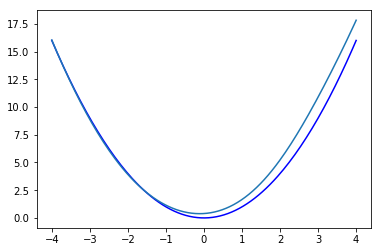

In [8]:
x_ = np.linspace(-4, 4, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.plot(pred_x, pred_y, '-') # plot network output

In [9]:
import warnings
warnings.filterwarnings("ignore")

## Copyright Note


## Deep Learning Reference

**Most of the deep learning and convolution neural network materials' figures, definitions, and examples are courtesy of or adapted from the following book **: **Deep Learning with Python by Francois Chollet (2018)** [relative link](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=sr_1_3?ie=UTF8&qid=1532546159&sr=8-3&keywords=deep+learning+with+python)

**Other examples are adapted from wiki and internet resources**

**The materials flow and content copyright to Samir Abdelrahman**




# Neural Network-- weights

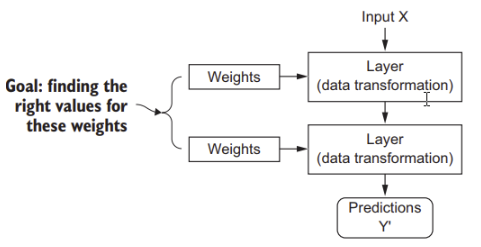


# Neural Network-- Loss function

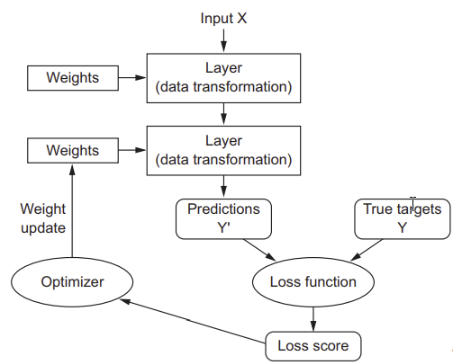

# Neural Network-- Adjust weights

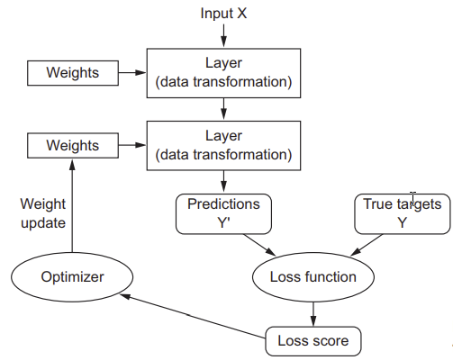

# Keras, TensorFlow, Theano, and CNTK

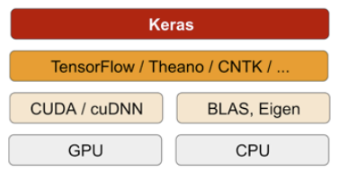

**Google web search interest** for different deep-learning frameworks over time

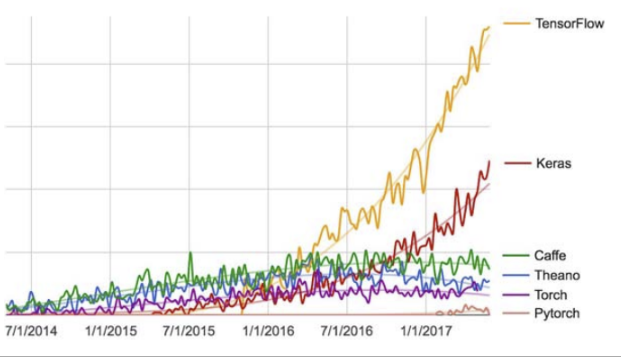

What are the tensors?
*Tensor is as simple as it is a value container. *

In [10]:
# tensor with 0-dim = scalor
import numpy as np
x=np.array(12)
print(x)
print(x.ndim)

12
0


In [11]:
# Vextor: 1-dim tensor
x=np.array([12,3,6,14])
print(x)
print(x.ndim)

[12  3  6 14]
1


In [12]:
# Matrix: 2-dim tensor
x=np.array([[12,3,6,14],
            [1,2,4,5]])
print(x)
print(x.ndim)

[[12  3  6 14]
 [ 1  2  4  5]]
2


In [13]:
x.shape

(2, 4)

In [14]:
# 3-dim tensor
x=np.array([[[12,3,6,14],
            [1,2,4,5]],
            [[12,3,6,14],
            [1,2,4,5]]
           ])
print(x)
print(x.ndim)

[[[12  3  6 14]
  [ 1  2  4  5]]

 [[12  3  6 14]
  [ 1  2  4  5]]]
3


In [15]:
x.shape

(2, 2, 4)

# Fully-connected Neural Network

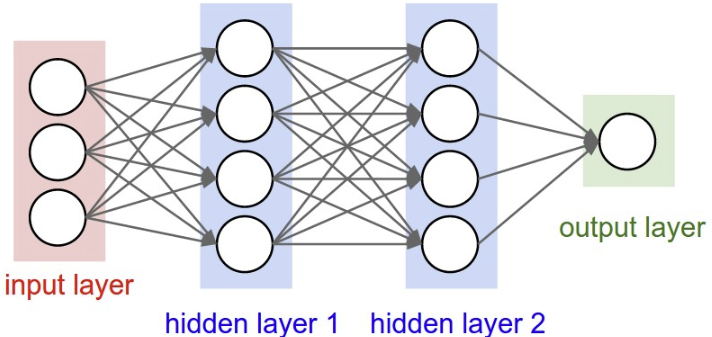

# MNIST Dataset(https://keras.io/datasets/)

## Multi-class problem

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


**Remember deep learning is not itself a classifier rather it is a feature learning approach. As such, you can use it to learn representation and you need to end up with a layer of classification (binary or mutli-class) or regression.  It is a feature representation to do a task**

**In spite of the fact it is a high-performing learning approach, but you need to use the best hyper-parameter combination to minimize the computational resourse you have**

In [16]:
#The Mnist database (http://yann.lecun.com/exdb/mnist/)

import warnings
warnings.filterwarnings("ignore")

from keras.datasets import mnist


# Step 1: Load the data
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()

#Step 2: See the data distribution
print(len(train_labels))
print(train_labels)
print(train_images.shape)
print(len(test_labels))
print(test_labels)
print(test_images.shape)

Using TensorFlow backend.


60000
[5 0 4 ... 5 6 8]
(60000, 28, 28)
10000
[7 2 1 ... 4 5 6]
(10000, 28, 28)


In [17]:
#Step 3: Prpare the tensors and normalize and have them float
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [18]:
#Step 4: Encode the categories

from keras.utils import to_categorical
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [19]:
print(len(train_labels),train_labels)

60000 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [20]:
print(len(test_labels),test_labels)

10000 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Activation Functions and Loss Functions in Last Layers

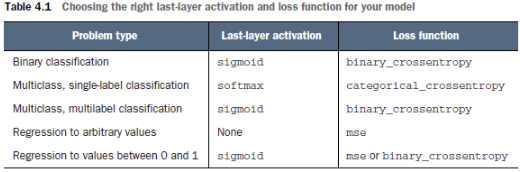

[Activation Function in Keras](https://keras.io/activations/)

In [21]:
#Build the model
from keras import models
from keras import layers
network =models.Sequential()
network.add(layers.Dense(1024,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(512,activation='sigmoid'))
network.add(layers.Dense(10,activation='softmax'))
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])



Instructions for updating:
Colocations handled automatically by placer.


## Question (Interpret the above model with the summary)?

In [22]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
network.fit(train_images,train_labels,epochs=5,batch_size=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.2257 - acc: 0.9307
Epoch 2/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0816 - acc: 0.9745
Epoch 3/5
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0541 - acc: 0.9835
Epoch 4/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0396 - acc: 0.9877
Epoch 5/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0284 - acc: 0.9912


In [24]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test_acc',test_acc)

#Overfitting?

10000/10000 [==============================] - 9s 920us/step
test_acc 0.9736
